<a href="https://colab.research.google.com/github/Peckkie/DPDM2021/blob/main/Mini_Project_COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# เชื่อมต่อไดร์ฟ

In [1]:
from google.colab import drive # เชื่อม google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir( '/content/drive/MyDrive/DPDM_ME/my_project/data') # local path
!ls

 Countries_ranked_by_life_expectancy.csv
 covid_19_clean_complete.csv
 covid_19_data.csv
 data_after_clean.csv
 data_berfore_clean.csv
 DataFromWeb
 Net_Change.csv
'time_series_covid19_confirmed_global (1).csv'
 time_series_covid19_confirmed_global.csv
'time_series_covid19_deaths_global (1).csv'
 time_series_covid19_deaths_global.csv
'time_series_covid19_recovered_global (1).csv'
 time_series_covid19_recovered_global.csv
 time_series_covid19_worldometer.csv
 worldometer_covid.csv
 worldometer.csv


# Install packet

In [3]:
!pip install pmdarima #สำหรับใช้กับตัวแบบทางสถิติ ARIMA

     |████████████████████████████████| 1.4 MB 27.1 MB/s 
     |████████████████████████████████| 9.8 MB 40.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


# Explore data

## o เปิดไฟล์ข้อมูล

In [4]:
import numpy as np 
import pandas as pd # data processing, CSV file  (e.g. pd.read_csv)

In [5]:
#ตารางที่มีข้อมูล covid-19
covid = pd.read_csv('covid_19_data.csv')
print('row count : ', covid.shape[0])
print('column count : ', covid.shape[1]) 

row count :  306429
column count :  6


In [6]:
covid.columns #แสดง column ทั้งหมด

Index(['Date', 'Province/State', 'Country/Region', 'Confirmed', 'Deaths',
       'Recovered'],
      dtype='object')

In [7]:
covid.head()#แสดงตาราง covid 5 แถวแรก

,Date,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


In [8]:
print("ขนาดของข้อมูล: ",covid.shape)

ขนาดของข้อมูล:  (306429, 6)


In [9]:
#ตารางที่มีข้อมูลประชากร
worldometer = pd.read_csv('worldometer.csv') 
print('row count : ', worldometer.shape[0])
print('column count : ', worldometer.shape[1]) 
worldometer.head()

row count :  229
column count :  3


,Unnamed: 0,Country/Region,Population
0,0,China,"1,439,323,776"
1,1,India,"1,380,004,385"
2,2,United States,"331,002,651"
3,3,Indonesia,"273,523,615"
4,4,Pakistan,"220,892,340"


In [10]:
worldometer

,Unnamed: 0,Country/Region,Population
0,0,China,"1,439,323,776"
1,1,India,"1,380,004,385"
2,2,United States,"331,002,651"
3,3,Indonesia,"273,523,615"
4,4,Pakistan,"220,892,340"
...,...,...,...
224,224,Tuvalu,"11,792"
225,225,Wallis & Futuna,"11,239"
226,226,Nauru,"10,824"
227,227,Saint Barthelemy,"9,877"


## o เช็คค่า missing

In [11]:
print("เช็ค null values:\n",covid.isnull().sum())  #พบคอลัมน์ Province/State มีค่า missing

เช็ค null values:
 Date                  0
Province/State    78100
Country/Region        0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64


In [12]:
# ลบคอลัมน์ Province/State ออกเนื่องจากข้อมูลส่วนนี้มีส่วนสำคัญที่จะนำไปวิเคราะห์ต่อหากเติมค่า missing ด้วย mode อาจทำให้ข้อมูลมีความคลาดเคลื่อนได้
covid.drop('Province/State', axis='columns', inplace=True)

In [13]:
print("เช็ค null values:\n",covid.isnull().sum())

เช็ค null values:
 Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
dtype: int64


In [14]:
print("เช็ค ประเภทข้อมูล:\n",covid.dtypes)#พบคอลัมน์ Date เป็นประเภท object ควรเปลี่ยนเป็น datetime

เช็ค ประเภทข้อมูล:
 Date               object
Country/Region     object
Confirmed         float64
Deaths            float64
Recovered         float64
dtype: object


In [15]:
# แปลงคอลัมน์ "Date" เป็น Datetime 
covid["Date"]=pd.to_datetime(covid["Date"])

In [16]:
print("เช็ค ประเภทข้อมูล:\n",covid.dtypes)

เช็ค ประเภทข้อมูล:
 Date              datetime64[ns]
Country/Region            object
Confirmed                float64
Deaths                   float64
Recovered                float64
dtype: object


In [17]:
print("เช็ค null values:\n",worldometer.isnull().sum())

เช็ค null values:
 Unnamed: 0        0
Country/Region    0
Population        0
dtype: int64


In [18]:
print("เช็ค ประเภทข้อมูล:\n",worldometer.dtypes) #พบคอลัมน์ Population เป็นประเภท object ควรเปลี่ยนเป็น int

เช็ค ประเภทข้อมูล:
 Unnamed: 0         int64
Country/Region    object
Population        object
dtype: object


In [19]:
Population = worldometer['Population'].tolist()
a = []
for i in Population:
    a_= i.replace(',', '')
    a.append(int(a_))

worldometer['Population'] = a

In [20]:
print("เช็ค ประเภทข้อมูล:\n",worldometer.dtypes)

เช็ค ประเภทข้อมูล:
 Unnamed: 0         int64
Country/Region    object
Population         int64
dtype: object


## o เชื่อมตาราง
เชื่อมตาราง covid และ worldometer ด้วยคอมลัมน์ key คือ Country/Region

In [21]:
worldometer.head()

,Unnamed: 0,Country/Region,Population
0,0,China,1439323776
1,1,India,1380004385
2,2,United States,331002651
3,3,Indonesia,273523615
4,4,Pakistan,220892340


In [22]:
covid.head()

,Date,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0


### เปลี่ยนชื่อประเทศของสองตารางให้ตรงกัน

In [23]:
print(len(set(worldometer['Country/Region'])  - set(covid['Country/Region'])))#Country/Region ของตาราง worldometer ที่ ตาราง covid ไม่มี
set(worldometer['Country/Region']) - set(covid['Country/Region'])

39


{'American Samoa',
 'Anguilla',
 'Bermuda',
 'British Virgin Islands',
 'Brunei ',
 'Caribbean Netherlands',
 'Congo',
 'Cook Islands',
 'Curaçao',
 'Czech Republic (Czechia)',
 "Côte d'Ivoire",
 'DR Congo',
 'Faeroe Islands',
 'French Polynesia',
 'Isle of Man',
 'Macao',
 'Myanmar',
 'Nauru',
 'New Caledonia',
 'North Korea',
 'Northern Mariana Islands',
 'Palau',
 'Réunion',
 'Saint Helena',
 'Saint Kitts & Nevis',
 'Saint Martin',
 'Sao Tome & Principe',
 'Sint Maarten',
 'St. Vincent & Grenadines',
 'State of Palestine',
 'Tonga',
 'Turkmenistan',
 'Turks and Caicos',
 'Tuvalu',
 'U.S. Virgin Islands',
 'United Kingdom',
 'United States',
 'Wallis & Futuna',
 'Western Sahara'}

In [24]:
#
worldometer = worldometer.replace({'Country/Region': {'Czech Republic (Czechia)':'Czech Republic', 
                                     'Réunion':'Reunion',
                                     'St. Vincent & Grenadines':'Saint Vincent and the Grenadines',  
                                     "Côte d'Ivoire":'Ivory Coast', 
                                     'Curaçao':'Curacao', 
                                     'Saint Kitts & Nevis':'Saint Kitts and Nevis', 
                                     'Faeroe Islands':'Faroe Islands', 
                                     'United Kingdom':'UK',
                                     'Macao':'Macau', 
                                     'United States':'US'}})

In [25]:
covid = covid.replace({'Country/Region': {'St. Martin':'Saint Martin', "('St. Martin',)":'Sint Maarten'}})

In [26]:
print(len(set(worldometer['Country/Region'])  - set(covid['Country/Region'])))

27


### merge ตาราง

In [27]:
covid = pd.merge(covid, worldometer, how="left", on=['Country/Region']) #เชื่อมตารางด้วยคอลัมน์ key 'Country/Region' และ เชื่อมโดยยึดตารางด้านซ้าย(ตาราง covid) เป็นหลัก(left)
covid.drop('Unnamed: 0', axis=1, inplace=True)
covid

,Date,Country/Region,Confirmed,Deaths,Recovered,Population
0,2020-01-22,Mainland China,1.0,0.0,0.0,NaN
1,2020-01-22,Mainland China,14.0,0.0,0.0,NaN
2,2020-01-22,Mainland China,6.0,0.0,0.0,NaN
3,2020-01-22,Mainland China,1.0,0.0,0.0,NaN
4,2020-01-22,Mainland China,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...
306424,2021-05-29,Ukraine,102641.0,2335.0,95289.0,43733762.0
306425,2021-05-29,Netherlands,29147.0,245.0,0.0,17134872.0
306426,2021-05-29,Mainland China,1364.0,1.0,1324.0,NaN
306427,2021-05-29,Ukraine,87550.0,1738.0,83790.0,43733762.0


In [28]:
print("เช็ค null values:\n",covid.isnull().sum()) #มี 20218 row missing เพราะว่ามี 27 ประเทศที่ไม่มีจำนวนประชากร

เช็ค null values:
 Date                  0
Country/Region        0
Confirmed             0
Deaths                0
Recovered             0
Population        20218
dtype: int64


# 1 ศึกษาการระบาดของ COVID-19 ด้วยการทำ Visualizations และการจัดกลุ่มข้อมูลวิธี Clustering

## o Visualizations

### -การวิเคราะห์ตามวันที่

In [29]:
#groupby ObservationDate เเละเเสดงผลรวมรายวัน
datewise=covid.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise["Days Since"]=datewise.index-datewise.index.min()
datewise

,Confirmed,Recovered,Deaths,Days Since
Date,,,,
2020-01-22,557.0,30.0,17.0,0 days
2020-01-23,1097.0,60.0,34.0,1 days
2020-01-24,941.0,39.0,26.0,2 days
2020-01-25,1437.0,42.0,42.0,3 days
2020-01-26,2118.0,56.0,56.0,4 days
...,...,...,...,...
2021-05-25,167848207.0,104824935.0,3485788.0,489 days
2021-05-26,168416423.0,105380748.0,3498544.0,490 days
2021-05-27,168970791.0,106078106.0,3511297.0,491 days


In [30]:
import plotly.express as px
fig=px.bar(x=datewise.index,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
fig.update_layout(title="Distribution of Number of Active Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()

#Active Cases = Number of Confirmed Cases - Number of Recovered Cases - Number of Death Cases
#การเพิ่มจำนวน Active Cases จะบ่งบอกได้ว่าจำนวนของ Recovered case หรือ Death case ลดลงมากเมื่อเทียบกับจำนวน Confirmed Cases

#### อัตราการเพิ่มขึ้นของ Confirmed, Recovered และ  Death Cases ทั่วโลก

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [32]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))
# fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Deaths"],
#                     mode='lines+markers',
#                     name='Death Cases'))
fig.update_layout(title="Growth rate of different types of cases (Wold)",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

#สรุปได้ว่า จากกราฟอัตราการเพิ่มขึ้นในเเต่ละวันของ Confirmed และ Recovered จะเเนวโน้มเพิ่มขึ้นเรื่อยๆ

#### การวิเคราะห์อัตราการตายและอัตราการฟื้นตัวทั่วโลก

In [33]:
datewise["WeekOfYear"]=datewise.index.weekofyear

week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise["WeekOfYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



In [34]:
from plotly.subplots import make_subplots

In [35]:
max(datewise["Confirmed"])

169951560.0

In [36]:
#Calculating the Mortality Rate and Recovery Rate
datewise["Mortality Rate"]=(datewise["Deaths"]/datewise["Confirmed"])*100
datewise["Recovery Rate"]=(datewise["Recovered"]/datewise["Confirmed"])*100
datewise["Active Cases"]=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]
datewise["Closed Cases"]=datewise["Recovered"]+datewise["Deaths"]

print("Average Mortality Rate",datewise["Mortality Rate"].mean())
print("Average Recovery Rate",datewise["Recovery Rate"].mean())

#Plotting Mortality and Recovery Rate 
fig = make_subplots(rows=3, cols=1,
                   subplot_titles=("Confirmed case proportion", "Recovery Rate", "Mortatlity Rate"))

fig.add_trace(
    go.Scatter(x=datewise.index, y=(datewise["Confirmed"]/max(datewise["Confirmed"]))*100,name="Confirmed case proportion"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=datewise.index, y=(datewise["Recovered"]/datewise["Confirmed"])*100,name="Recovery Rate"),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=datewise.index, y=(datewise["Deaths"]/datewise["Confirmed"])*100,name="Mortality Rate"),
    row=3, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Confirmed case proportion", row=1, col=1)
fig.update_xaxes(title_text="Date", row=2, col=2)
fig.update_yaxes(title_text="Recovery Rate", row=2, col=1)
fig.update_xaxes(title_text="Date", row=3, col=1)
fig.update_yaxes(title_text="Mortality Rate", row=3, col=1)
fig.show()

#Mortality rate = (Number of Death Cases / Number of Confirmed Cases) x 100
#Recovery rate= (Number of Recoverd Cases / Number of Confirmed Cases) x 100
#สรุปผล
#Mortality rate  เเสดงให้เห็นว่าใช้เวลานานพอสมควรกว่าจะมีเเนวโน้มของจำนวนคนตายที่ลดลงบ่งบอกได้ถึงการจัดการรับมือกับเชื้อโควิดที่ดีขึ้น
#Recovery rate เเสดงให้เห็นว่าช่วงเดือนพฤษภาคม - มิถุนายน บ่งบอกได้ถึงความรุนเเรงของเชื้อโควิดว่าอาจเกิดการกลายพันธ์ได้ทำให้มีจำนวนผู้เสียที่สูงมาก
# หรือเป็นช่วงเวลาที่เกิดการรุนเเรงที่สุดของเชื่อโควิด

Average Mortality Rate 3.3985574175088837
Average Recovery Rate 51.14820182446859


### -การวิเคราะห์ตามประเทศ 

In [37]:
#Calculating countrywise Moratality and Recovery Rate
countrywise=covid[covid["Date"]==covid["Date"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

In [38]:
grouped_country=covid.groupby(["Country/Region","Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
grouped_country["Active Cases"]=grouped_country["Confirmed"]-grouped_country["Recovered"]-grouped_country["Deaths"]
grouped_country["log_confirmed"]=np.log(grouped_country["Confirmed"])
grouped_country["log_active"]=np.log(grouped_country["Active Cases"])

country_last_24_confirmed=[]
country_last_24_recovered=[]
country_last_24_deaths=[]
for country in countrywise.index:
    country_last_24_confirmed.append((grouped_country.loc[country].iloc[-1]-grouped_country.loc[country].iloc[-2])["Confirmed"])
    country_last_24_recovered.append((grouped_country.loc[country].iloc[-1]-grouped_country.loc[country].iloc[-2])["Recovered"])
    country_last_24_deaths.append((grouped_country.loc[country].iloc[-1]-grouped_country.loc[country].iloc[-2])["Deaths"])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log



In [39]:
Last_24_Hours_country=pd.DataFrame(list(zip(countrywise.index,country_last_24_confirmed,country_last_24_recovered,country_last_24_deaths)),
                                   columns=["Country Name","Last 24 Hours Confirmed","Last 24 Hours Recovered","Last 24 Hours Deaths"])

In [40]:
covid

,Date,Country/Region,Confirmed,Deaths,Recovered,Population
0,2020-01-22,Mainland China,1.0,0.0,0.0,NaN
1,2020-01-22,Mainland China,14.0,0.0,0.0,NaN
2,2020-01-22,Mainland China,6.0,0.0,0.0,NaN
3,2020-01-22,Mainland China,1.0,0.0,0.0,NaN
4,2020-01-22,Mainland China,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...
306424,2021-05-29,Ukraine,102641.0,2335.0,95289.0,43733762.0
306425,2021-05-29,Netherlands,29147.0,245.0,0.0,17134872.0
306426,2021-05-29,Mainland China,1364.0,1.0,1324.0,NaN
306427,2021-05-29,Ukraine,87550.0,1738.0,83790.0,43733762.0


Text(0.5, 1.0, 'Top 15 Countries with Highest Number of Death Cases in Last 24 Hours (2021-05-29)')

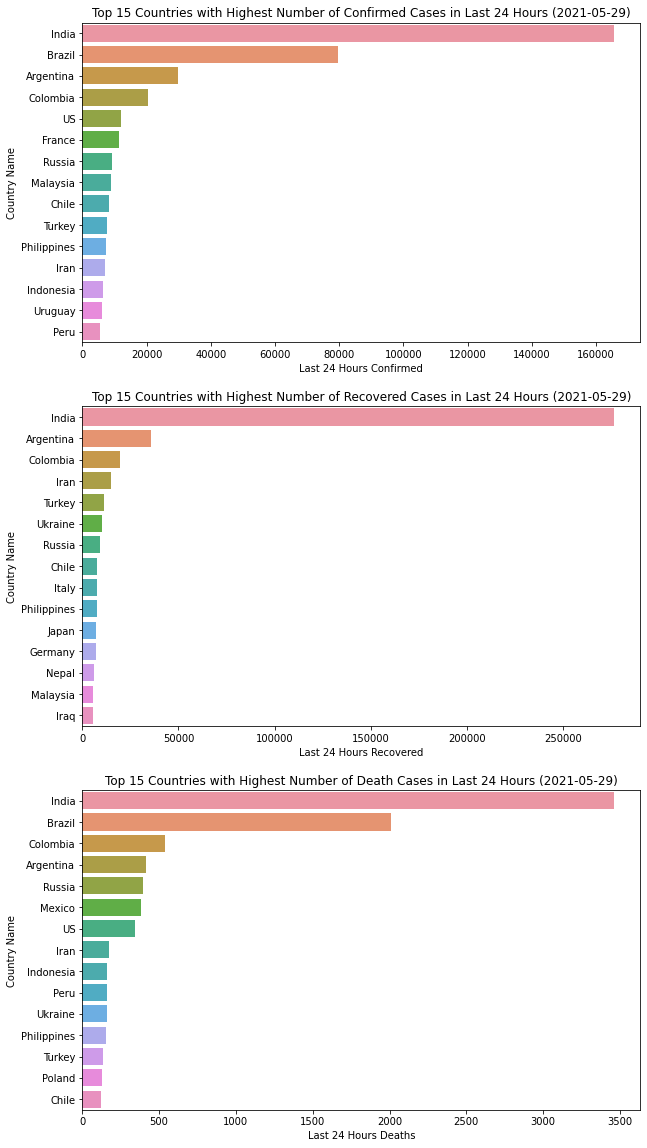

In [41]:
Top_15_Confirmed_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Confirmed"],ascending=False).head(15)  #วันสุดท้ายที่เรมี ข้อมูล
Top_15_Recoverd_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Recovered"],ascending=False).head(15)
Top_15_Deaths_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Deaths"],ascending=False).head(15)


fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(10,20))
sns.barplot(x=Top_15_Confirmed_24hr["Last 24 Hours Confirmed"],y=Top_15_Confirmed_24hr["Country Name"],ax=ax1)
ax1.set_title("Top 15 Countries with Highest Number of Confirmed Cases in Last 24 Hours (2021-05-29)")
sns.barplot(x=Top_15_Recoverd_24hr["Last 24 Hours Recovered"],y=Top_15_Recoverd_24hr["Country Name"],ax=ax2)
ax2.set_title("Top 15 Countries with Highest Number of Recovered Cases in Last 24 Hours (2021-05-29)")
sns.barplot(x=Top_15_Deaths_24hr["Last 24 Hours Deaths"],y=Top_15_Deaths_24hr["Country Name"],ax=ax3)
ax3.set_title("Top 15 Countries with Highest Number of Death Cases in Last 24 Hours (2021-05-29)")

#### สัดส่วนของประเทศใน Confirmed Recovered และ Death Cases

##### สัดส่วนต่อผลรวมทุกประเทศใน 1 วันสุดท้าย

In [42]:
Last_24_Hours_country["Proportion of Confirmed"]=(Last_24_Hours_country["Last 24 Hours Confirmed"]/(datewise["Confirmed"].iloc[-1]-datewise["Confirmed"].iloc[-2]))*100
Last_24_Hours_country["Proportion of Recovered"]=(Last_24_Hours_country["Last 24 Hours Recovered"]/(datewise["Recovered"].iloc[-1]-datewise["Recovered"].iloc[-2]))*100
Last_24_Hours_country["Proportion of Deaths"]=(Last_24_Hours_country["Last 24 Hours Deaths"]/(datewise["Deaths"].iloc[-1]-datewise["Deaths"].iloc[-2]))*100

Last_24_Hours_country[["Country Name","Proportion of Confirmed","Proportion of Recovered","Proportion of Deaths"]].sort_values(["Proportion of Confirmed"],ascending=False).style.background_gradient(cmap="Reds")

,Country Name,Proportion of Confirmed,Proportion of Recovered,Proportion of Deaths
1,India,34.430314,54.434397,32.946106
2,Brazil,16.569093,0.694050,19.158256
8,Argentina,6.206079,7.018125,3.951628
11,Colombia,4.262169,3.873325,5.141878
0,US,2.490667,0.000000,3.266045
3,France,2.397288,0.134358,0.628452
5,Russia,1.903980,1.801812,3.761188
39,Malaysia,1.875903,1.088849,0.933156
22,Chile,1.708694,1.515957,1.133118
4,Turkey,1.592230,2.202522,1.304513


##### สัดส่วนต่อประชากรของเเต่ละประเทศใน 1 วันสุดท้าย

In [43]:
Last_24_Hours_country.head()
print('row count : ', Last_24_Hours_country.shape[0])
print('column count : ', Last_24_Hours_country.shape[1]) 

row count :  195
column count :  7


In [44]:
Last_24_Hours_country['Population'] = Last_24_Hours_country['Country Name'].map(worldometer.set_index('Country/Region')['Population'])
print('row count : ', Last_24_Hours_country.shape[0])
print('column count : ', Last_24_Hours_country.shape[1]) 
Last_24_Hours_country#เชื่อมตารางด้วยคอลัมน์ key 'Country/Region' 

row count :  195
column count :  8


,Country Name,Last 24 Hours Confirmed,Last 24 Hours Recovered,Last 24 Hours Deaths,Proportion of Confirmed,Proportion of Recovered,Proportion of Deaths,Population
0,US,11976.0,0.0,343.0,2.490667,0.000000,3.266045,3.310027e+08
1,India,165553.0,276309.0,3460.0,34.430314,54.434397,32.946106,1.380004e+09
2,Brazil,79670.0,3523.0,2012.0,16.569093,0.694050,19.158256,2.125594e+08
3,France,11527.0,682.0,66.0,2.397288,0.134358,0.628452,6.527351e+07
4,Turkey,7656.0,11180.0,137.0,1.592230,2.202522,1.304513,8.433907e+07
...,...,...,...,...,...,...,...,...
190,Vanuatu,0.0,0.0,0.0,0.000000,0.000000,0.000000,3.071450e+05
191,Marshall Islands,0.0,0.0,0.0,0.000000,0.000000,0.000000,5.919000e+04
192,Samoa,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.984140e+05
193,Kiribati,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.194490e+05


In [45]:
print("เช็ค null values:\n",Last_24_Hours_country.isnull().sum())

เช็ค null values:
 Country Name                0
Last 24 Hours Confirmed     0
Last 24 Hours Recovered     0
Last 24 Hours Deaths        0
Proportion of Confirmed     0
Proportion of Recovered     0
Proportion of Deaths        0
Population                 11
dtype: int64


In [46]:
Last_24_Hours_country_propolation = Last_24_Hours_country.dropna()

In [47]:
print("เช็ค null values:\n",Last_24_Hours_country_propolation.isnull().sum())

เช็ค null values:
 Country Name               0
Last 24 Hours Confirmed    0
Last 24 Hours Recovered    0
Last 24 Hours Deaths       0
Proportion of Confirmed    0
Proportion of Recovered    0
Proportion of Deaths       0
Population                 0
dtype: int64


In [48]:
Last_24_Hours_country_propolation.dtypes

Country Name                object
Last 24 Hours Confirmed    float64
Last 24 Hours Recovered    float64
Last 24 Hours Deaths       float64
Proportion of Confirmed    float64
Proportion of Recovered    float64
Proportion of Deaths       float64
Population                 float64
dtype: object

In [49]:
Last_24_Hours_country_propolation["Proportion of Confirmed"]=(Last_24_Hours_country_propolation["Last 24 Hours Confirmed"]/Last_24_Hours_country_propolation['Population'])*100
Last_24_Hours_country_propolation["Proportion of Recovered"]=(Last_24_Hours_country_propolation["Last 24 Hours Recovered"]/Last_24_Hours_country_propolation['Population'])*100
Last_24_Hours_country_propolation["Proportion of Deaths"]=(Last_24_Hours_country_propolation["Last 24 Hours Deaths"]/Last_24_Hours_country_propolation['Population'])*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [50]:
Last_24_Hours_country_propolation[["Country Name","Proportion of Confirmed","Proportion of Recovered","Proportion of Deaths"]].sort_values(["Proportion of Confirmed"],ascending=False).style.background_gradient(cmap="Reds")

,Country Name,Proportion of Confirmed,Proportion of Recovered,Proportion of Deaths
105,Maldives,0.196469,0.253633,0.000370
71,Bahrain,0.192351,0.148862,0.000940
61,Uruguay,0.171977,0.105362,0.001670
8,Argentina,0.066026,0.078822,0.000918
22,Chile,0.042979,0.040254,0.000623
11,Colombia,0.040277,0.038640,0.001061
2,Brazil,0.037481,0.001657,0.000947
134,Suriname,0.035798,0.021479,0.001023
53,Paraguay,0.034055,0.031223,0.001332
39,Malaysia,0.027869,0.017077,0.000303


Text(0.5, 1.0, 'Top 15 countries as per Number of Death Cases')

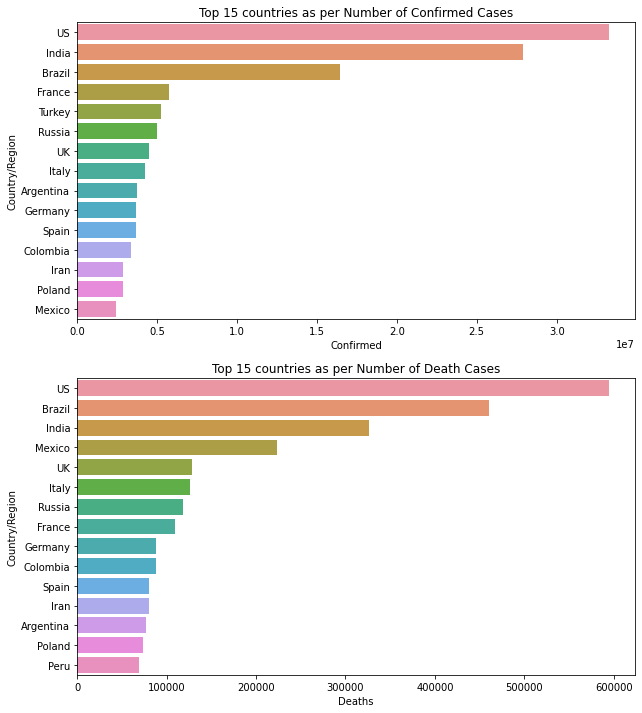

In [51]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,12))
top_15_confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15_deaths=countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15_confirmed["Confirmed"],y=top_15_confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per Number of Confirmed Cases")
sns.barplot(x=top_15_deaths["Deaths"],y=top_15_deaths.index,ax=ax2)
ax2.set_title("Top 15 countries as per Number of Death Cases")

##### 15 อันดับสูงสุดประเทศตามอัตราการเสียชีวิตและอัตราการฟื้นตัวที่มี Confirmed Cases มากกว่า 500 ราย

Text(0.5, 0, 'Recovery (in Percentage)')

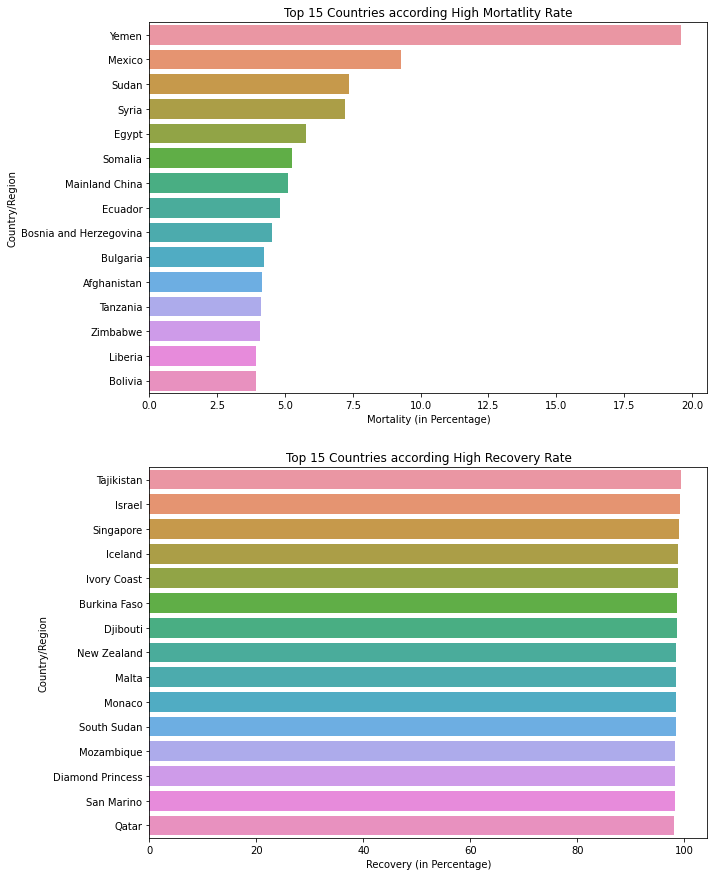

In [52]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("Top 15 Countries according High Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovery"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("Top 15 Countries according High Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")

Text(0.5, 0, 'Recovery (in Percentage)')

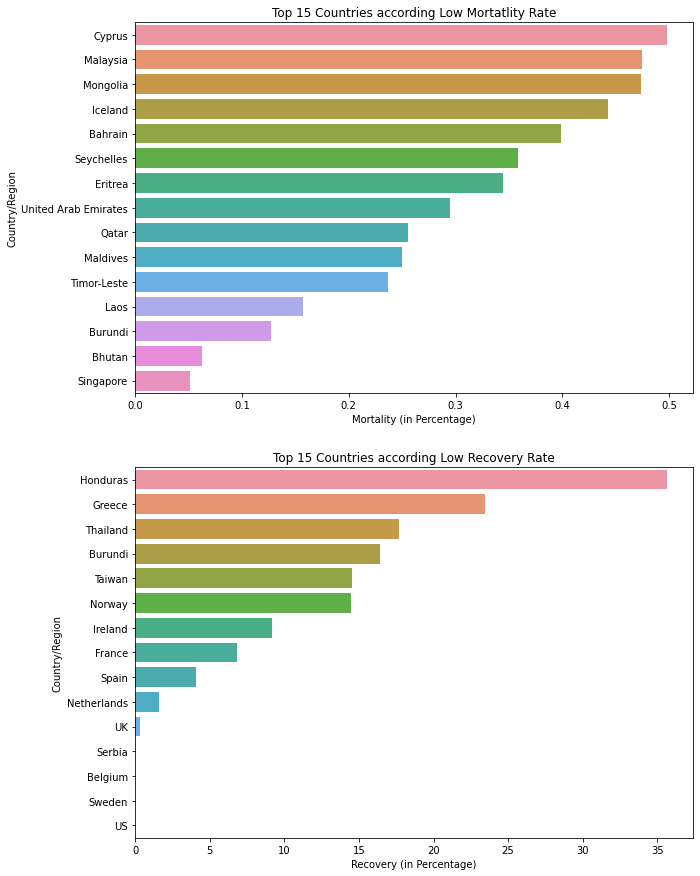

In [53]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).tail(15)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("Top 15 Countries according Low Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovery"],ascending=False).tail(15)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("Top 15 Countries according Low Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")

## o การจัดกลุ่มข้อมูลวิธี Clustering
จัดกลุ่มประเทศโดยพิจารณา Mortality rate กับ Recovery rate เนื่องจากทราบว่า COVID-19 มีอัตราการเสียชีวิตที่แตกต่างกันในแต่ละประเทศโดยพิจารณาจากปัจจัยต่างๆ และอัตราการฟื้นตัวก็เช่นกัน เนื่องจากแนวทางปฏิบัติในการควบคุมการระบาดใหญ่ของแต่ละประเทศ นอกจากนี้ อัตราการเสียชีวิตและอัตราการฟื้นตัวจะพิจารณาจาก Confirmed Recoverd และ Deaths cases

### -Import library

In [54]:
#import packet StandardScaler เพื่อทำการ normalization ข้อมูล
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [55]:
#import packet KMeans เพื่อทำการสร้างโมเดลในการจัดกลุ่มข้อมูล
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

### -Normalization ข้อมูล

In [56]:
X=countrywise[["Mortality","Recovery"]]
X

,Mortality,Recovery
Country/Region,,
US,1.787282,0.000000
India,1.168576,91.251129
Brazil,2.799103,88.007382
France,1.914692,6.833678
Turkey,0.902811,97.293743
...,...,...
Vanuatu,25.000000,75.000000
Marshall Islands,0.000000,100.000000
Samoa,0.000000,100.000000


In [57]:
#Standard Scaling since K-Means Clustering is a distance based alogrithm
X=std.fit_transform(X) 
X[0:5]

array([[-0.13259083, -3.19381604],
       [-0.34746838,  0.37668599],
       [ 0.21881596,  0.24976367],
       [-0.08834139, -2.92642579],
       [-0.43976895,  0.61312324]])

### -เลือกจำนวนกลุ่มที่ดีที่สุด

In [58]:
wcss=[]
sil=[]
# fine-tune n_clusters ตั้งแต่ 2 ถึง 10
for i in range(2,11):
    clf=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clf.fit(X)
    labels=clf.labels_
    centroids=clf.cluster_centers_
    sil.append(silhouette_score(X, labels, metric='euclidean'))
    wcss.append(clf.inertia_)

In [59]:
#import packet matplotlib เพื่อ plot graph
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Elbow Method')

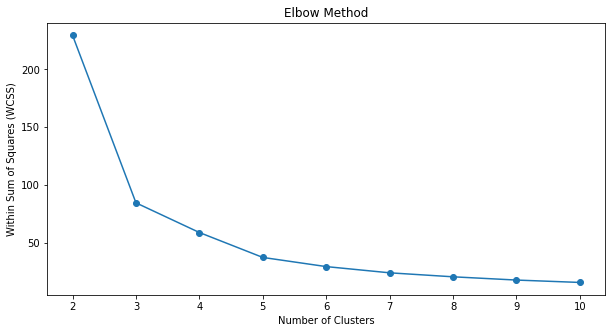

In [60]:
x=np.arange(2,11)
plt.figure(figsize=(10,5))
plt.plot(x,wcss,marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Within Sum of Squares (WCSS)")
plt.title("Elbow Method")

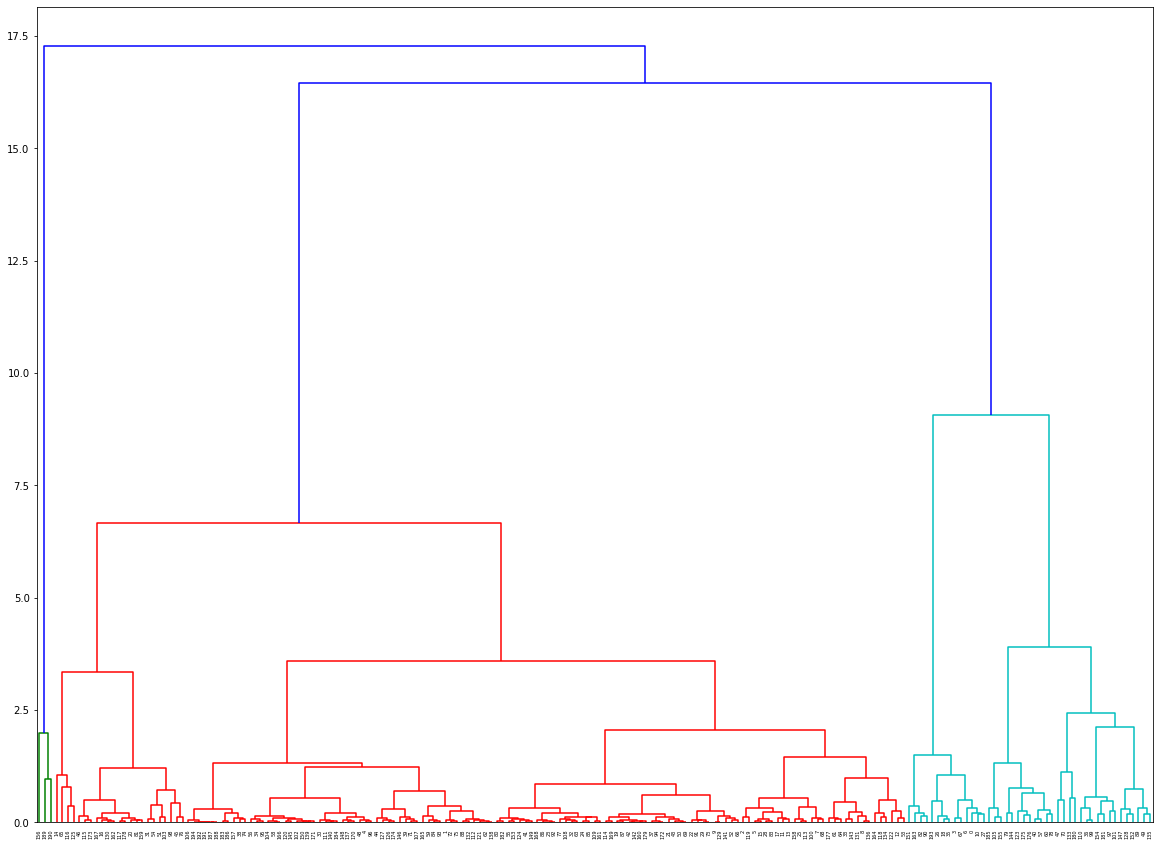

In [61]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,15))
dendogram=sch.dendrogram(sch.linkage(X, method  = "ward"))

In [62]:
#ทั้ง 2 วิธีการ Elbow Method และ Hierarchical Clustering แสดงให้เห็นว่า K=3 จะแก้ไขจำนวนคลัสเตอร์ 

### -สร้างโมเดล KMeans และจัดกลุ่มข้อมูล

In [63]:
# สร้างตัวแบบ
clf_final=KMeans(n_clusters=3,init='k-means++',random_state=6)
clf_final.fit(X)

KMeans(n_clusters=3, random_state=6)

In [64]:
# ทำนายกลุ่มข้อมูล
countrywise["Clusters"]=clf_final.predict(X)

In [65]:
# Summary of Clusters  เเสดงเเค่ Top - 15
cluster_summary=pd.concat([countrywise[countrywise["Clusters"]==1].head(15),countrywise[countrywise["Clusters"]==2].head(15),countrywise[countrywise["Clusters"]==0].head(15)])
cluster_summary.style.background_gradient(cmap='Reds').format("{:.2f}") #ควรเป็นหน่วยเดียวกัน 

,Confirmed,Recovered,Deaths,Mortality,Recovery,Clusters
Country/Region,,,,,,
US,33251939.00,0.00,594306.00,1.79,0.00,1.00
France,5719877.00,390878.00,109518.00,1.91,6.83,1.00
UK,4496823.00,15481.00,128037.00,2.85,0.34,1.00
Spain,3668658.00,150376.00,79905.00,2.18,4.10,1.00
Netherlands,1671967.00,26810.00,17889.00,1.07,1.60,1.00
Sweden,1068473.00,0.00,14451.00,1.35,0.00,1.00
Belgium,1059763.00,0.00,24921.00,2.35,0.00,1.00
Serbia,712046.00,0.00,6844.00,0.96,0.00,1.00
Switzerland,693023.00,317600.00,10805.00,1.56,45.83,1.00


In [66]:
print("Avergae Mortality Rate of Cluster 0: ",countrywise[countrywise["Clusters"]==0]["Mortality"].mean())
print("Avergae Recovery Rate of Cluster 0: ",countrywise[countrywise["Clusters"]==0]["Recovery"].mean())
print("Avergae Mortality Rate of Cluster 1: ",countrywise[countrywise["Clusters"]==1]["Mortality"].mean())
print("Avergae Recovery Rate of Cluster 1: ",countrywise[countrywise["Clusters"]==1]["Recovery"].mean())
print("Avergae Mortality Rate of Cluster 2: ",countrywise[countrywise["Clusters"]==2]["Mortality"].mean())
print("Avergae Recovery Rate of Cluster 2: ",countrywise[countrywise["Clusters"]==2]["Recovery"].mean())

Avergae Mortality Rate of Cluster 0:  1.8778857075218816
Avergae Recovery Rate of Cluster 0:  90.74888221767142
Avergae Mortality Rate of Cluster 1:  1.7016403411803394
Avergae Recovery Rate of Cluster 1:  22.335095583921884
Avergae Mortality Rate of Cluster 2:  22.272707263793283
Avergae Recovery Rate of Cluster 2:  67.75849166652911


In [67]:
# Cluster 0 คือรัฐบาลบริหารงานไม่ดี และประชาชนไม่ดูแลตัวเอง กลุ่มประเทศที่มีอัตราการเสียชีวิตสูงเมื่อเทียบกับกลุ่มอื่นและมีอัตราการฟื้นตัวที่ดีพอสมควร 
# Cluster 1 คือรัฐบาลบริหารงานที่ดี กลุ่มประเทศที่มีอัตราการเสียชีวิตต่ำและอัตราการฟื้นตัวสูงจริงๆ เหล่านี้เป็นชุดของประเทศที่สามารถควบคุม COVID-19 ได้โดยปฏิบัติตามแนวทางการควบคุมการระบาดใหญ่อย่างเข้มงวด
# Cluster 2 คือรัฐบาลบริหารงานไม่ดี แต่ประชาชนดูแลตัวเองได้ กลุ่มประเทศที่มีอัตราการเสียชีวิตต่ำและอัตราการฟื้นตัวที่ต่ำ ประเทศเหล่านี้จำเป็นต้องเร่งอัตราการหมุนเวียนเพื่อเอาตัวรอด บางประเทศมีผู้ติดเชื้อจำนวนมาก 
              # แต่อัตราการเสียชีวิตต่ำถือเป็นสัญญาณที่ดี เเต่บางประเทศก็พบข้อมูลผิดปรกติตรงที่ข้อมูลไม่มีอัตราการฟื้นตัวถ้าแปลความตรงตัวถือว่ากำลังประสบการระบาดครั้งใหญ่ที่เลวร้ายที่สุด

In [68]:
#import library seaborn เพื่อ plot graph
import seaborn as sns

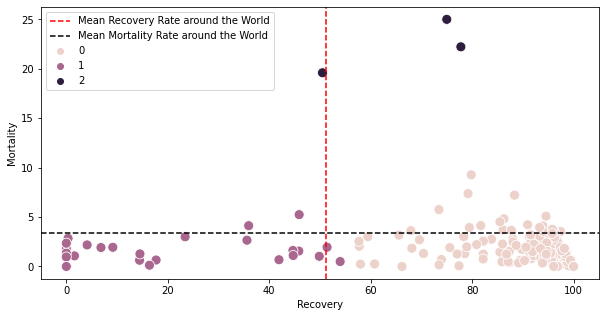

In [69]:
#Grouping different types of cases as per the date
datewise=covid.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise["Days Since"]=datewise.index-datewise.index.min()

#plot graph การกระจายตัวของกลุ่ม
plt.figure(figsize=(10,5))
sns.scatterplot(x=countrywise["Recovery"],y=countrywise["Mortality"],hue=countrywise["Clusters"],s=100)
plt.axvline(((datewise["Recovered"]/datewise["Confirmed"])*100).mean(),
            color='red',linestyle="--",label="Mean Recovery Rate around the World")
plt.axhline(((datewise["Deaths"]/datewise["Confirmed"])*100).mean(),
            color='black',linestyle="--",label="Mean Mortality Rate around the World")
plt.legend()

In [70]:
#เเสดงประเทศในเเต่ละกลุ่ม
print("Few Countries belonging to Cluster 0: ",list(countrywise[countrywise["Clusters"]==0].head(15).index))
print("Few Countries belonging to Cluster 1: ",list(countrywise[countrywise["Clusters"]==1].head(15).index))
print("Few Countries belonging to Cluster 2: ",list(countrywise[countrywise["Clusters"]==2].head(15).index))

Few Countries belonging to Cluster 0:  ['India', 'Brazil', 'Turkey', 'Russia', 'Italy', 'Argentina', 'Germany', 'Colombia', 'Iran', 'Poland', 'Mexico', 'Ukraine', 'Peru', 'Indonesia', 'Czech Republic']
Few Countries belonging to Cluster 1:  ['US', 'France', 'UK', 'Spain', 'Netherlands', 'Sweden', 'Belgium', 'Serbia', 'Switzerland', 'Greece', 'Ireland', 'Honduras', 'Thailand', 'Norway', 'Finland']
Few Countries belonging to Cluster 2:  ['Yemen', 'MS Zaandam', 'Vanuatu']


# 2 คาดการณ์และพยากรณ์อนุกรมเวลาเพื่อศึกษาผลกระทบและการแพร่กระจายของ COVID-19 ในอนาคต

โดยวิธี KNeighborsRegressor
ต้องทำการทำนาย 5 วันข้างหน้า ว่า จำนวน Confirmed case จะมีจำนวนเท่าไหร่
- ข้อมูล X เป็นข้อมูล 5 วัน ของ Confirmed case (วันที่ต่อกัน)
- ข้อมูล y เป็นข้อมูล 5 วันข้างหน้า ของ Confirmed case  นับจากวันสุดท้ายของข้อมูล X 


## o model ทาง mining เเบบทำนาย 5 วันถัดไป และข้อมูล X ไม่ต่อเนื่อง

### -เตรียมข้อมูล

In [71]:
datewise.head() #ข้อมูลที่ใช้ในสร้างตัวแบบทำนาย

,Confirmed,Recovered,Deaths,Days Since
Date,,,,
2020-01-22,557.0,30.0,17.0,0 days
2020-01-23,1097.0,60.0,34.0,1 days
2020-01-24,941.0,39.0,26.0,2 days
2020-01-25,1437.0,42.0,42.0,3 days
2020-01-26,2118.0,56.0,56.0,4 days


In [72]:
Confirmed = datewise['Confirmed'].tolist() 

In [73]:
m= 0
x,y=[],[]
for i in range(0,97): #5*97 = 485 row
    n = m
    m = m+5
    a = Confirmed[n:m]
    b = Confirmed[m+5] #  y =5วัน
    x.append(a)
    y.append(b)

products_list = x
df = pd.DataFrame (products_list, columns = ['x1','x2','x3','x4','x5'])
df['y'] = y

In [74]:
df #ข้อมูลที่จะใช้ในการสร้าง model ทำนาย

,x1,x2,x3,x4,x5,y
0,557.0,1097.0,941.0,1437.0,2118.0,12038.0
1,2927.0,5578.0,6165.0,8235.0,9925.0,30818.0
2,12038.0,16787.0,19881.0,23892.0,27636.0,44803.0
3,30818.0,34392.0,37121.0,40151.0,42763.0,71226.0
4,44803.0,45222.0,60370.0,66887.0,69033.0,76843.0
...,...,...,...,...,...,...
92,147872402.0,148716872.0,149622864.0,150520466.0,151399480.0,156070729.0
93,152196159.0,152870507.0,153552097.0,154359533.0,155200757.0,159690774.0
94,156070729.0,156902287.0,157688833.0,158330372.0,158952301.0,163069932.0
95,159690774.0,160450873.0,161176148.0,161894208.0,162521726.0,165808192.0


In [ ]:
# import numpy as np
# knn_regression_data = df
# knn_regression_data = (knn_regression_data - np.min(knn_regression_data))/(np.max(knn_regression_data) - np.min(knn_regression_data))
# knn_regression_data.describe().T

### -Spilt Train Test
เเบ่งข้อมูลออกเป็น:


*   Train 85%
*   Test 15%



In [75]:
#import library train_test_split เพื่อใช้ในการเเบ่งข้อมูล
from sklearn.model_selection import train_test_split

In [76]:
train_df = df.drop("y", axis = 1)
test_df = df["y"] 

In [77]:
X_train, X_test, y_train, y_test = train_test_split(train_df, test_df, test_size = 0.15, random_state = 20) 

In [78]:
print('Train row : ', len(X_train))
print('Test row : ', len(X_test))

Train row :  82
Test row :  15


### -Train model by not find-tune parameter

In [79]:
#import library KNeighborsRegressor เพื่อใช้สร้างโมเดลทำนาย
from sklearn.neighbors import KNeighborsRegressor
#import library mean_squared_error, r2_score เพื่อใช้ในการวัดประสิทธิภาพของโมเดล
from sklearn.metrics import mean_squared_error, r2_score

In [80]:
# Split train validation
# train 90 %
# validation 10 %

independent_train, independent_test, dependent_train, dependent_test = train_test_split(X_train, y_train, test_size = 0.10, random_state = 20)

In [81]:
print(len(independent_train))

73


In [82]:
print(len(independent_test))

9


In [83]:
knn_model = KNeighborsRegressor().fit(independent_train, dependent_train)
predicted_values = knn_model.predict(independent_test)

In [84]:
knn_model

KNeighborsRegressor()

In [85]:
predict_df = pd.DataFrame({"Dependent_Test" : dependent_test, "Dependent_Predicted" : predicted_values})
predict_df.head()

,Dependent_Test,Dependent_Predicted
71,97600922.0,96922406.8
63,71903759.0,69491646.4
43,26349650.0,26159400.0
11,593447.0,166111.0
76,109226751.0,110372474.0


In [86]:
print("Mean Squared Error = ", mean_squared_error(predict_df.Dependent_Test, predict_df.Dependent_Predicted))
print("Root Mean Squared Error = ", np.sqrt(mean_squared_error(predict_df.Dependent_Test, predict_df.Dependent_Predicted)))

#If we want to examine the success of the model with statistical methods, we can look at the MSE value. 
#In statistics, the mean squared error (MSE) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is,
#  the average squared difference between the estimated values and the actual value.
#ถ้าเราต้องการตรวจสอบความสำเร็จของแบบจำลองด้วยวิธีทางสถิติ เราสามารถดูค่า MSE ได้
#ในสถิติ ค่าคลาดเคลื่อนกำลังสองเฉลี่ย (MSE) ของตัวประมาณ (ของขั้นตอนการประเมินปริมาณที่ไม่ได้สังเกต) จะวัดค่าเฉลี่ยของกำลังสองของข้อผิดพลาด—
# นั่นคือ ผลต่างกำลังสองเฉลี่ยระหว่างค่าที่ประมาณไว้กับค่าจริง 

Mean Squared Error =  1028868222365.1128
Root Mean Squared Error =  1014331.4164340532


In [87]:
r2_score_notFindTune = r2_score(predict_df.Dependent_Predicted, predict_df.Dependent_Test)
r2_score_notFindTune
# R-squared values range from 0 to 1 and are commonly stated as percentages from 0% to 100%. 
# An R-squared of 100% means that all dependent variables are completely explained by movements in the index (or the independent variable(s) you are interested in).
# ค่า R-squared มีตั้งแต่ 0 ถึง 1 และมักระบุเป็นเปอร์เซ็นต์ตั้งแต่ 0% ถึง 100%
# R-squared ที่ 100% หมายความว่าตัวแปรตามทั้งหมดได้รับการอธิบายอย่างสมบูรณ์โดยการเคลื่อนไหวในดัชนี (หรือตัวแปรอิสระที่คุณสนใจ) 

0.9993845166290022

### -Parameter Tuning by k= 10 fold cross validation

In [88]:
# Split train validation
# train 90 %
# validation 10 %

independent_train, independent_test, dependent_train, dependent_test = train_test_split(X_train, y_train, test_size = 0.10, random_state = 20)

In [89]:
print('independent_train:', independent_train.shape)
print('independent_test:', independent_test.shape)
print('dependent_train:',dependent_train.shape)
print('dependent_test:', dependent_test.shape)

independent_train: (73, 5)
independent_test: (9, 5)
dependent_train: (73,)
dependent_test: (9,)


In [90]:
independent_train.head()

,x1,x2,x3,x4,x5
94,156070729.0,156902287.0,157688833.0,158330372.0,158952301.0
6,76843.0,78599.0,78985.0,79570.0,80415.0
57,47144151.0,47662335.0,48261049.0,48857709.0,49502844.0
88,132419139.0,133103485.0,133943335.0,134691380.0,135355887.0
37,16060589.0,16266501.0,16501712.0,16706155.0,17046048.0


In [91]:
dependent_train.head()

94    163069932.0
6         90311.0
57     52914405.0
88    139931461.0
37     18563730.0
Name: y, dtype: float64

In [92]:
#import library KNeighborsRegressor เพื่อใช้สร้างโมเดลทำนาย
from sklearn.neighbors import KNeighborsRegressor
#import library mean_squared_error, r2_score เพื่อใช้ในการวัดประสิทธิภาพของโมเดล
from sklearn.metrics import mean_squared_error, r2_score

In [93]:
from sklearn.model_selection import GridSearchCV
import numpy as np

knn_params = {"n_neighbors" : np.arange(1,11,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10) 
knn_cv_model.fit(independent_train, dependent_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [94]:
knn_cv_model.best_params_["n_neighbors"]
#As a result of the Parameter Tuning process, we determined that the optimum neighbor number (k) is 2.

2

In [95]:
knn_model = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(independent_train, dependent_train)
predicted_values = knn_model.predict(independent_test)

In [96]:
knn_model

KNeighborsRegressor(n_neighbors=2)

In [97]:
predict_df = pd.DataFrame({"Dependent_Test" : dependent_test, "Dependent_Predicted" : predicted_values})
predict_df

,Dependent_Test,Dependent_Predicted
71,97600922.0,102891874.5
63,71903759.0,71411149.0
43,26349650.0,24363234.0
11,593447.0,267536.0
76,109226751.0,109283048.0
15,2152147.0,2142104.0
7,105832.0,109320.0
55,47144151.0,47339008.5
24,6169766.0,6183910.0


In [98]:
print("Mean Squared Error = ", mean_squared_error(predict_df.Dependent_Test, predict_df.Dependent_Predicted))
print("Root Mean Squared Error = ", np.sqrt(mean_squared_error(predict_df.Dependent_Test, predict_df.Dependent_Predicted)))
#We see that the mse value decreases in the use of optimum parameters.
#เราเห็นว่าค่า mse ลดลงเมื่อใช้พารามิเตอร์ที่เหมาะสมที่สุด 

Mean Squared Error =  3592262372508.6113
Root Mean Squared Error =  1895326.4553919495


In [99]:
r2_score_notFindTune

0.9993845166290022

In [100]:
r2_score_FindTune = r2_score(predict_df.Dependent_Test, predict_df.Dependent_Predicted)
r2_score_FindTune

0.9978570180409665

In [101]:
from sklearn.model_selection import cross_val_score

MSE = []
MSE_CV = []

for k in range(10):
    k = k + 1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(independent_train, dependent_train)
    y_pred = knn_model.predict(independent_test)
    mse = mean_squared_error(y_pred, dependent_test)
    # r2 = r2_score(y_pred, dependent_test)
    mse_cv = -1 * cross_val_score(knn_model, independent_train,dependent_train, cv = 10,
                         scoring = "neg_mean_squared_error").mean()
    MSE.append(mse)
    MSE_CV.append(mse_cv)
    # print("k =", k, "MSE :", mse, "MSE_CV:", mse_cv, "R2_SCORE:", r2)
    print("k =", k, "MSE :", mse, "MSE_CV:", mse_cv)

k = 1 MSE : 4141180673262.3335 MSE_CV: 5495772699781.691
k = 2 MSE : 3592262372508.6113 MSE_CV: 4244060419413.8203
k = 3 MSE : 1328062236487.3225 MSE_CV: 5572258255480.457
k = 4 MSE : 953159297490.0903 MSE_CV: 7396795888320.467
k = 5 MSE : 1028868222365.1128 MSE_CV: 9384080573200.3
k = 6 MSE : 1706645136790.0244 MSE_CV: 16053182859910.365
k = 7 MSE : 1216414465871.7598 MSE_CV: 21788661117660.6
k = 8 MSE : 1912272193442.481 MSE_CV: 25131314581822.023
k = 9 MSE : 4209522162085.2056 MSE_CV: 32531352318806.523
k = 10 MSE : 3151454428500.633 MSE_CV: 39454621723575.21


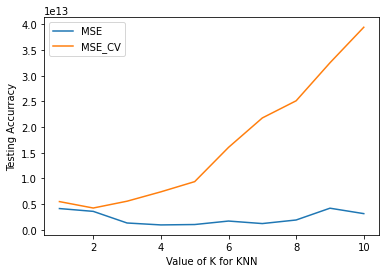

In [102]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1,11,1), MSE, label ='MSE' )
plt.plot(np.arange(1,11,1), MSE_CV, label ='MSE_CV')
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accurracy");
plt.legend()

### -Training model by best parametor

In [103]:
knn_cv_model.best_params_

{'n_neighbors': 2}

In [104]:
knn_full = KNeighborsRegressor(n_neighbors= 2)

In [105]:
knn_full.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [106]:
y_pred= knn_full.predict(X_test)
y_pred

array([8.57110025e+07, 1.02891874e+08, 5.10220000e+04, 1.19077182e+08,
       2.77053955e+07, 2.98084375e+07, 4.65657000e+05, 1.73121595e+07,
       5.10220000e+04, 3.27622280e+07, 9.89641305e+07, 1.61380353e+08,
       1.36175300e+08, 1.53781588e+08, 9.80715000e+04])

In [107]:
predict_df_full = pd.DataFrame({"Dependent_Test" : y_test, "Dependent_Predicted" : y_pred})
predict_df_full

,Dependent_Test,Dependent_Predicted
69,90983503.0,85711002.5
73,103027363.0,102891874.5
2,44803.0,51022.0
81,119062678.0,119077182.5
44,27617704.0,27705395.5
47,31937561.0,29808437.5
12,932440.0,465657.0
36,17326649.0,17312159.5
0,12038.0,51022.0
48,33423047.0,32762228.0


In [108]:
print("Mean Squared Error = ", mean_squared_error(predict_df.Dependent_Test, predict_df.Dependent_Predicted))
print("Root Mean Squared Error = ", np.sqrt(mean_squared_error(predict_df.Dependent_Test, predict_df.Dependent_Predicted)))
#We see that the mse value decreases in the use of optimum parameters.
#เราเห็นว่าค่า mse ลดลงเมื่อใช้พารามิเตอร์ที่เหมาะสมที่สุด 

Mean Squared Error =  3592262372508.6113
Root Mean Squared Error =  1895326.4553919495


In [109]:
r2_score_full = r2_score(predict_df_full.Dependent_Test, predict_df_full.Dependent_Predicted)
r2_score_full

0.9983232907313568

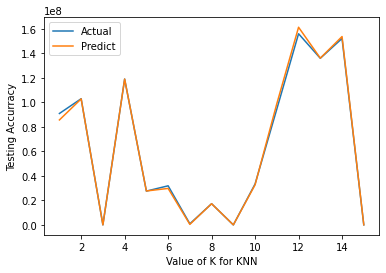

In [110]:
plt.plot(np.arange(1,16,1), predict_df_full.Dependent_Test, label ='Actual' )
plt.plot(np.arange(1,16,1), predict_df_full.Dependent_Predicted, label ='Predict')
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accurracy");
plt.legend()

In [111]:
daataa = y_train.append(predict_df_full.Dependent_Test)

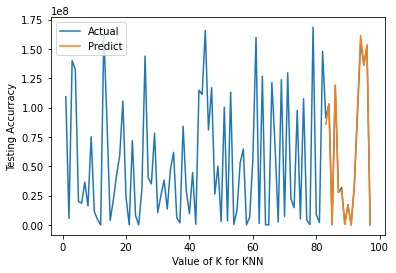

In [112]:
plt.plot(np.arange(1,98,1), daataa, label ='Actual' ) #กราฟข้อมูล Actual ของทั้ง train และ test กับ Predict  ของ Confirmed case       
plt.plot(np.arange(83,98,1), predict_df_full.Dependent_Predicted, label ='Predict')
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accurracy");
plt.legend()

### -ทดลองทำนาย

In [113]:
Train=df.iloc[:int(df.shape[0]*0.85)] # 85 % for train
Test=df.iloc[int(df.shape[0]*0.85):]# 15 % for test
print('Train row : ', len(Train))
print('Test row : ', len(Test))

Train row :  82
Test row :  15


In [114]:
X_Test = Test.drop("y", axis = 1)
Y_Test = Test["y"] 

In [115]:
Y_pred= knn_full.predict(X_Test)

In [116]:
predict_df_Exp = pd.DataFrame({"Dependent_Test" : Y_Test, "Dependent_Predicted" : Y_pred})
predict_df_Exp

,Dependent_Test,Dependent_Predicted
82,121238378.0,122465557.0
83,123692736.0,122465557.0
84,126717855.0,125205295.5
85,129609483.0,128163669.0
86,132419139.0,131014311.0
87,136046628.0,136175300.0
88,139931461.0,141887140.5
89,143842820.0,141887140.5
90,147872402.0,145857611.0
91,152196159.0,153781588.0


In [117]:
print("Mean Squared Error = ", mean_squared_error(predict_df.Dependent_Test, predict_df.Dependent_Predicted))
print("Root Mean Squared Error = ", np.sqrt(mean_squared_error(predict_df.Dependent_Test, predict_df.Dependent_Predicted)))
#We see that the mse value decreases in the use of optimum parameters.
#เราเห็นว่าค่า mse ลดลงเมื่อใช้พารามิเตอร์ที่เหมาะสมที่สุด 

Mean Squared Error =  3592262372508.6113
Root Mean Squared Error =  1895326.4553919495


In [118]:
r2_score_Exp = r2_score(predict_df_Exp.Dependent_Test, predict_df_Exp.Dependent_Predicted)
r2_score_Exp

0.9831517042672816

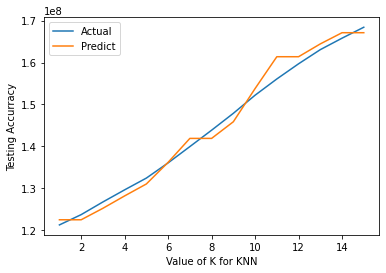

In [119]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1,16,1), predict_df_Exp.Dependent_Test, label ='Actual' )
plt.plot(np.arange(1,16,1), predict_df_Exp.Dependent_Predicted, label ='Predict')
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accurracy");
plt.legend()

## o model ทาง mining เเบบทำนาย 1 วันถัดไป และข้อมูล X ต่อเนื่อง

### -เตรียมข้อมูล

In [120]:
datewise.head() #ข้อมูลที่ใช้ในสร้างตัวแบบทำนาย

,Confirmed,Recovered,Deaths,Days Since
Date,,,,
2020-01-22,557.0,30.0,17.0,0 days
2020-01-23,1097.0,60.0,34.0,1 days
2020-01-24,941.0,39.0,26.0,2 days
2020-01-25,1437.0,42.0,42.0,3 days
2020-01-26,2118.0,56.0,56.0,4 days


In [121]:
Confirmed = datewise['Confirmed'].tolist() 

x,y=[],[]
for i in range(0,489): #494-5 = 489 row
    a = Confirmed[i:i+5]
    b = Confirmed[i+5]
    x.append(a)
    y.append(b)

products_list = x
df = pd.DataFrame (products_list, columns = ['x1','x2','x3','x4','x5'])
df['y'] = y

In [122]:
df #ข้อมูลที่จะใช้ในการสร้าง model ทำนาย

,x1,x2,x3,x4,x5,y
0,557.0,1097.0,941.0,1437.0,2118.0,2927.0
1,1097.0,941.0,1437.0,2118.0,2927.0,5578.0
2,941.0,1437.0,2118.0,2927.0,5578.0,6165.0
3,1437.0,2118.0,2927.0,5578.0,6165.0,8235.0
4,2118.0,2927.0,5578.0,6165.0,8235.0,9925.0
...,...,...,...,...,...,...
484,165182316.0,165808192.0,166385987.0,166862062.0,167316362.0,167848207.0
485,165808192.0,166385987.0,166862062.0,167316362.0,167848207.0,168416423.0
486,166385987.0,166862062.0,167316362.0,167848207.0,168416423.0,168970791.0
487,166862062.0,167316362.0,167848207.0,168416423.0,168970791.0,169470725.0


### -Spilt Train Test
เเบ่งข้อมูลออกเป็น:


*   Train 85%
*   Test 15%

In [123]:
#import library train_test_split เพื่อใช้ในการเเบ่งข้อมูล
from sklearn.model_selection import train_test_split

In [124]:
train_df = df.drop("y", axis = 1)
test_df = df["y"] 

In [125]:
X_train, X_test, y_train, y_test = train_test_split(train_df, test_df, test_size = 0.15, random_state = 20) 

In [126]:
print('Train row : ', len(X_train))
print('Test row : ', len(X_test))

Train row :  415
Test row :  74


### -Train model by not find-tune parameter

In [127]:
#import library KNeighborsRegressor เพื่อใช้สร้างโมเดลทำนาย
from sklearn.neighbors import KNeighborsRegressor
#import library mean_squared_error, r2_score เพื่อใช้ในการวัดประสิทธิภาพของโมเดล
from sklearn.metrics import mean_squared_error, r2_score

In [128]:
# Split train validation
# train 90 %
# validation 10 %

independent_train, independent_test, dependent_train, dependent_test = train_test_split(X_train, y_train, test_size = 0.10, random_state = 20)

In [129]:
print(len(independent_train))
print(len(independent_test))

373
42


In [130]:
knn_model = KNeighborsRegressor().fit(independent_train, dependent_train)
predicted_values = knn_model.predict(independent_test)

In [131]:
knn_model

KNeighborsRegressor()

In [132]:
predict_df = pd.DataFrame({"Dependent_Test" : dependent_test, "Dependent_Predicted" : predicted_values})
predict_df.head()

,Dependent_Test,Dependent_Predicted
487,169470725.0,168117364.6
58,467535.0,436710.2
115,5105342.0,5065876.4
362,98828107.0,98783544.4
160,11465291.0,11347270.4


In [133]:
print("Mean Squared Error = ", mean_squared_error(predict_df.Dependent_Test, predict_df.Dependent_Predicted))
print("Root Mean Squared Error = ", np.sqrt(mean_squared_error(predict_df.Dependent_Test, predict_df.Dependent_Predicted)))

#If we want to examine the success of the model with statistical methods, we can look at the MSE value. 
#In statistics, the mean squared error (MSE) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is,
#  the average squared difference between the estimated values and the actual value.
#ถ้าเราต้องการตรวจสอบความสำเร็จของแบบจำลองด้วยวิธีทางสถิติ เราสามารถดูค่า MSE ได้
#ในสถิติ ค่าคลาดเคลื่อนกำลังสองเฉลี่ย (MSE) ของตัวประมาณ (ของขั้นตอนการประเมินปริมาณที่ไม่ได้สังเกต) จะวัดค่าเฉลี่ยของกำลังสองของข้อผิดพลาด—
# นั่นคือ ผลต่างกำลังสองเฉลี่ยระหว่างค่าที่ประมาณไว้กับค่าจริง 

Mean Squared Error =  98532341849.42876
Root Mean Squared Error =  313898.6171511891


In [134]:
r2_score_notFindTune = r2_score(predict_df.Dependent_Predicted, predict_df.Dependent_Test)
r2_score_notFindTune
# R-squared values range from 0 to 1 and are commonly stated as percentages from 0% to 100%. 
# An R-squared of 100% means that all dependent variables are completely explained by movements in the index (or the independent variable(s) you are interested in).
# ค่า R-squared มีตั้งแต่ 0 ถึง 1 และมักระบุเป็นเปอร์เซ็นต์ตั้งแต่ 0% ถึง 100%
# R-squared ที่ 100% หมายความว่าตัวแปรตามทั้งหมดได้รับการอธิบายอย่างสมบูรณ์โดยการเคลื่อนไหวในดัชนี (หรือตัวแปรอิสระที่คุณสนใจ) 

0.9999739441455521

### -Parameter Tuning by k= 10 fold cross validation

In [135]:
# Split train validation
# train 90 %
# validation 10 %

independent_train, independent_test, dependent_train, dependent_test = train_test_split(X_train, y_train, test_size = 0.10, random_state = 20)

In [136]:
print('independent_train:', independent_train.shape)
print('independent_test:', independent_test.shape)
print('dependent_train:',dependent_train.shape)
print('dependent_test:', dependent_test.shape)

independent_train: (373, 5)
independent_test: (42, 5)
dependent_train: (373,)
dependent_test: (42,)


In [137]:
independent_train.head()

,x1,x2,x3,x4,x5
480,163069932.0,163609626.0,164231811.0,164902903.0,165182316.0
273,41312694.0,41785529.0,42291897.0,42747081.0,43146722.0
155,9622227.0,9814145.0,9991750.0,10160658.0,10315466.0
413,118096454.0,118573350.0,119062678.0,119516794.0,119877179.0
474,158952301.0,159690774.0,160450873.0,161176148.0,161894208.0


In [138]:
dependent_train.head()

480    165808192.0
273     43587908.0
155     10489608.0
413    120226080.0
474    162521726.0
Name: y, dtype: float64

In [139]:
#import library KNeighborsRegressor เพื่อใช้สร้างโมเดลทำนาย
from sklearn.neighbors import KNeighborsRegressor
#import library mean_squared_error, r2_score เพื่อใช้ในการวัดประสิทธิภาพของโมเดล
from sklearn.metrics import mean_squared_error, r2_score

In [140]:
from sklearn.model_selection import GridSearchCV
import numpy as np

knn_params = {"n_neighbors" : np.arange(1,11,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10) 
knn_cv_model.fit(independent_train, dependent_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [141]:
knn_cv_model.best_params_["n_neighbors"]
#As a result of the Parameter Tuning process, we determined that the optimum neighbor number (k) is 2.

2

In [142]:
knn_model = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(independent_train, dependent_train)
predicted_values = knn_model.predict(independent_test)

In [143]:
knn_model

KNeighborsRegressor(n_neighbors=2)

In [144]:
predict_df = pd.DataFrame({"Dependent_Test" : dependent_test, "Dependent_Predicted" : predicted_values})
predict_df

,Dependent_Test,Dependent_Predicted
487,169470725.0,169461175.5
58,467535.0,473782.5
115,5105342.0,5106622.5
362,98828107.0,98437341.5
160,11465291.0,11458210.0
88,2811332.0,2667998.5
404,116547675.0,116303037.5
366,100925700.0,100933645.0
477,164231811.0,164395971.0
138,7772768.0,7772435.0


In [145]:
print("Mean Squared Error = ", mean_squared_error(predict_df.Dependent_Test, predict_df.Dependent_Predicted))
print("Root Mean Squared Error = ", np.sqrt(mean_squared_error(predict_df.Dependent_Test, predict_df.Dependent_Predicted)))
#We see that the mse value decreases in the use of optimum parameters.
#เราเห็นว่าค่า mse ลดลงเมื่อใช้พารามิเตอร์ที่เหมาะสมที่สุด 

Mean Squared Error =  93034867965.6012
Root Mean Squared Error =  305016.1765638032


In [146]:
r2_score_notFindTune

0.9999739441455521

In [147]:
r2_score_FindTune = r2_score(predict_df.Dependent_Test, predict_df.Dependent_Predicted)
r2_score_FindTune

0.9999753994936198

In [148]:
from sklearn.model_selection import cross_val_score

MSE = []
MSE_CV = []

for k in range(10):
    k = k + 1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(independent_train, dependent_train)
    y_pred = knn_model.predict(independent_test)
    mse = mean_squared_error(y_pred, dependent_test)
    # r2 = r2_score(y_pred, dependent_test)
    mse_cv = -1 * cross_val_score(knn_model, independent_train,dependent_train, cv = 10,
                         scoring = "neg_mean_squared_error").mean()
    MSE.append(mse)
    MSE_CV.append(mse_cv)
    # print("k =", k, "MSE :", mse, "MSE_CV:", mse_cv, "R2_SCORE:", r2)
    print("k =", k, "MSE :", mse, "MSE_CV:", mse_cv)

k = 1 MSE : 193769094910.6905 MSE_CV: 256730673883.0252
k = 2 MSE : 93034867965.6012 MSE_CV: 127045583820.4504
k = 3 MSE : 72198416402.88655 MSE_CV: 163022105379.16443
k = 4 MSE : 88003205440.40923 MSE_CV: 153382976298.98386
k = 5 MSE : 98532341849.42876 MSE_CV: 162362465641.0729
k = 6 MSE : 143640253021.48254 MSE_CV: 187448918232.9581
k = 7 MSE : 154348293700.59406 MSE_CV: 232867846938.8461
k = 8 MSE : 253022060824.8285 MSE_CV: 260541334342.70148
k = 9 MSE : 322934449746.8035 MSE_CV: 294297659736.3819
k = 10 MSE : 446640582497.32794 MSE_CV: 359558746773.3213


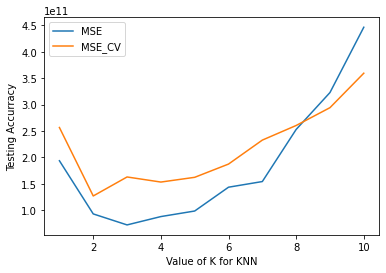

In [149]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1,11,1), MSE, label ='MSE' )
plt.plot(np.arange(1,11,1), MSE_CV, label ='MSE_CV')
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accurracy");
plt.legend()

### -Training model by best parametor

In [150]:
knn_cv_model.best_params_

{'n_neighbors': 2}

In [151]:
knn_full = KNeighborsRegressor(n_neighbors= 2)

In [152]:
knn_full.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [153]:
y_pred= knn_full.predict(X_test)
y_pred

array([1.06876945e+07, 2.34635065e+07, 4.51303095e+07, 9.17104510e+07,
       8.70080575e+07, 4.09620000e+04, 5.88247120e+07, 5.31206550e+06,
       8.04835000e+04, 1.16118882e+08, 6.89485800e+06, 8.27610000e+04,
       4.09620000e+04, 1.19045072e+08, 2.85440900e+06, 3.93777200e+06,
       8.55288330e+07, 1.64943200e+06, 1.33453830e+07, 3.70865695e+07,
       1.20732229e+08, 1.06598576e+08, 8.04299550e+06, 8.21217630e+07,
       1.25088265e+07, 9.82145145e+07, 1.07409142e+08, 2.39481705e+07,
       5.58450000e+04, 3.77879000e+05, 1.20642180e+07, 6.90650000e+03,
       3.11132180e+07, 4.77026000e+07, 7.30153935e+07, 9.27525600e+06,
       3.15655750e+06, 7.43328440e+07, 5.58450000e+04, 6.29121130e+07,
       1.40639385e+07, 1.47422490e+07, 2.59342590e+07, 1.30191074e+08,
       3.10140000e+04, 1.02578878e+08, 3.27134000e+06, 7.88742000e+05,
       1.73317310e+07, 3.64030640e+07, 1.04955242e+08, 8.94340000e+04,
       1.82306500e+05, 1.56295000e+05, 5.70276750e+06, 1.64707064e+08,
      

In [154]:
predict_df_full = pd.DataFrame({"Dependent_Test" : y_test, "Dependent_Predicted" : y_pred})
predict_df_full

,Dependent_Test,Dependent_Predicted
156,10706794.0,10687694.5
209,23459139.0,23463506.5
276,45116309.0,45130309.5
351,91689011.0,91710451.0
345,87329386.0,87008057.5
...,...,...
204,22174876.0,22185147.5
216,25262187.0,25417079.5
235,30555734.0,30539109.0
84,2471984.0,2474970.5


In [155]:
print("Mean Squared Error = ", mean_squared_error(predict_df.Dependent_Test, predict_df.Dependent_Predicted))
print("Root Mean Squared Error = ", np.sqrt(mean_squared_error(predict_df.Dependent_Test, predict_df.Dependent_Predicted)))
#We see that the mse value decreases in the use of optimum parameters.
#เราเห็นว่าค่า mse ลดลงเมื่อใช้พารามิเตอร์ที่เหมาะสมที่สุด 

Mean Squared Error =  93034867965.6012
Root Mean Squared Error =  305016.1765638032


In [156]:
r2_score_full = r2_score(predict_df_full.Dependent_Test, predict_df_full.Dependent_Predicted)
r2_score_full

0.9999892097275556

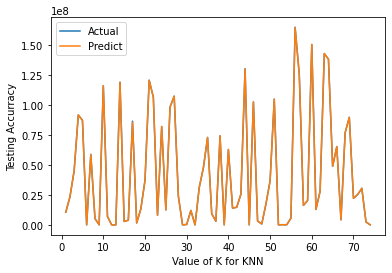

In [161]:
plt.plot(np.arange(1,75,1), predict_df_full.Dependent_Test, label ='Actual' )
plt.plot(np.arange(1,75,1), predict_df_full.Dependent_Predicted, label ='Predict')
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accurracy");
plt.legend()

In [162]:
daataa = y_train.append(predict_df_full.Dependent_Test)

In [163]:
daataa

436    133103485.0
261     38583083.0
394    112596489.0
397    113876236.0
241     32291026.0
          ...     
204     22174876.0
216     25262187.0
235     30555734.0
84       2471984.0
34         88368.0
Length: 489, dtype: float64

In [166]:
489-74

415

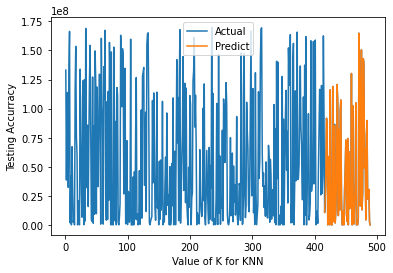

In [168]:
plt.plot(np.arange(1,490,1), daataa, label ='Actual' ) #กราฟข้อมูล Actual ของทั้ง train และ test กับ Predict  ของ Confirmed case       
plt.plot(np.arange(416,490,1), predict_df_full.Dependent_Predicted, label ='Predict')
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accurracy");
plt.legend()

### -ทดลองทำนาย

In [182]:
Train=df.iloc[:int(df.shape[0]*0.85)] # 85 % for train
Test=df.iloc[int(df.shape[0]*0.85):]# 15 % for test
print('Train row : ', len(Train))
print('Test row : ', len(Test))

Train row :  415
Test row :  74


In [183]:
X_Test = Test.drop("y", axis = 1)
Y_Test = Test["y"] 

In [184]:
Y_pred= knn_full.predict(X_Test)

In [185]:
predict_df_Exp = pd.DataFrame({"Dependent_Test" : Y_Test, "Dependent_Predicted" : Y_pred})
predict_df_Exp

,Dependent_Test,Dependent_Predicted
415,121238378.0,121515239.5
416,121792101.0,121515239.5
417,122353780.0,122072940.5
418,122852600.0,122603190.0
419,123275915.0,123484325.5
...,...,...
484,167848207.0,167582284.5
485,168416423.0,168693607.0
486,168970791.0,169220758.0
487,169470725.0,169220758.0


In [186]:
print("Mean Squared Error = ", mean_squared_error(predict_df.Dependent_Test, predict_df.Dependent_Predicted))
print("Root Mean Squared Error = ", np.sqrt(mean_squared_error(predict_df.Dependent_Test, predict_df.Dependent_Predicted)))
#We see that the mse value decreases in the use of optimum parameters.
#เราเห็นว่าค่า mse ลดลงเมื่อใช้พารามิเตอร์ที่เหมาะสมที่สุด 

Mean Squared Error =  93034867965.6012
Root Mean Squared Error =  305016.1765638032


In [187]:
r2_score_Exp = r2_score(predict_df_Exp.Dependent_Test, predict_df_Exp.Dependent_Predicted)
r2_score_Exp

0.9995247159784287

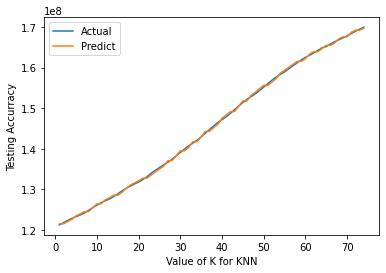

In [188]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1,75,1), predict_df_Exp.Dependent_Test, label ='Actual' )
plt.plot(np.arange(1,75,1), predict_df_Exp.Dependent_Predicted, label ='Predict')
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accurracy");
plt.legend()

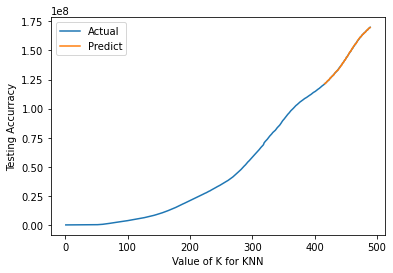

In [189]:
plt.plot(np.arange(1,490,1), df["y"] , label ='Actual' ) #กราฟข้อมูล Actual ของทั้ง train และ test กับ Predict  ของ Confirmed case       
plt.plot(np.arange(416,490,1), predict_df_Exp.Dependent_Predicted, label ='Predict')
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accurracy");
plt.legend()

## o model ทางสถิติ
ต้องทำการทำนาย 1 วันข้างหน้า ว่า จำนวน Confirmed case จะมีจำนวนเท่าไหร่

- ข้อมูล X เป็นข้อมูลวันที่สะสม
- ข้อมูล y เป็นข้อมูล Confirmed case 

#### -เตรียมข้อมูลและเเบ่งข้อมูล

In [190]:
datewise.head()

,Confirmed,Recovered,Deaths,Days Since
Date,,,,
2020-01-22,557.0,30.0,17.0,0 days
2020-01-23,1097.0,60.0,34.0,1 days
2020-01-24,941.0,39.0,26.0,2 days
2020-01-25,1437.0,42.0,42.0,3 days
2020-01-26,2118.0,56.0,56.0,4 days


In [191]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]

In [192]:
len(datewise) #แบ่งเป็น 2 ส่วน

494

In [193]:
len(train_ml) # 95 % -> train

469

In [194]:
len(valid_ml) # 5 % -> test

25

In [195]:
model_scores, r2_scores=[], []

#### -สร้างตัวแบบเเละทำนาย

##### =>1 Linear Regression Model for Confirm Cases Prediction

In [196]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [197]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days

In [198]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
model_scores=[]

In [199]:
train_Days_Since =  np.array(train_ml["Days Since"]).reshape(-1,1)
train_Confirmed =  np.array(train_ml["Confirmed"]).reshape(-1,1)
valid_Days_Since = np.array(valid_ml["Days Since"]).reshape(-1,1)
valid_Confirmed =  np.array(valid_ml["Confirmed"]).reshape(-1,1)

In [200]:
train_Days_Since[0:10]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [201]:
train_Confirmed[0:10]

array([[ 557.],
       [1097.],
       [ 941.],
       [1437.],
       [2118.],
       [2927.],
       [5578.],
       [6165.],
       [8235.],
       [9925.]])

In [202]:
lin_reg=LinearRegression(normalize=True)
lin_reg.fit(train_Days_Since, train_Confirmed)
prediction_valid_linreg=lin_reg.predict(valid_Days_Since)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





In [203]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(valid_Confirmed ,prediction_valid_linreg)))

Root Mean Square Error for Linear Regression:  33541511.296706144


In [204]:
r2_scores.append(r2_score(valid_Confirmed ,prediction_valid_linreg))
r2_score(valid_Confirmed ,prediction_valid_linreg)

-58.19767744234084

In [205]:
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
linreg_output=[]
for i in range(prediction_linreg.shape[0]):
    linreg_output.append(prediction_linreg[i][0])

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=linreg_output,
                    mode='lines',name="Linear Regression Best Fit Line",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Linear Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

# ตัวแบบการถดถอยเชิงเส้นกำลังแตกสลายโดยสิ้นเชิง
# ดังจะเห็นได้ชัดเจนว่าแนวโน้มของคดีที่ได้รับการยืนยันในรูปแบบไม่เชิงเส้นอย่างแน่นอน

<Figure size 792x432 with 0 Axes>

##### =>2 Polynomial Regression for Prediction of Confirmed Cases

In [206]:
from sklearn.preprocessing import PolynomialFeatures

In [207]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
poly = PolynomialFeatures(degree = 8) 

In [208]:
train_poly=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y=train_ml["Confirmed"]

In [209]:
train_poly[0:5] #transform

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01, 6.4000e+01, 1.2800e+02, 2.5600e+02],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02, 7.2900e+02, 2.1870e+03, 6.5610e+03],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03, 4.0960e+03, 1.6384e+04, 6.5536e+04]])

In [210]:
y.head()

Date
2020-01-22     557.0
2020-01-23    1097.0
2020-01-24     941.0
2020-01-25    1437.0
2020-01-26    2118.0
Name: Confirmed, dtype: float64

In [211]:
linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





LinearRegression(normalize=True)

In [212]:
prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  27362958.416571368


In [213]:
r2_scores.append(r2_score(valid_ml["Confirmed"],prediction_poly))
r2_score(valid_ml["Confirmed"],prediction_poly)

-38.39721431905808

In [214]:
comp_data=poly.fit_transform(np.array(datewise["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=linreg.predict(comp_data)

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Polynomial Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

##### =>3 Holt's Linear Model

In [215]:
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing

In [216]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [217]:
np.asarray(model_train["Confirmed"])[0:10]

array([ 557., 1097.,  941., 1437., 2118., 2927., 5578., 6165., 8235.,
       9925.])

In [218]:
holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=0.4, smoothing_slope=0.4,optimized=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead



In [219]:
y_pred["Holt"]=holt.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))
print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))

Root Mean Square Error Holt's Linear Model:  1696111.7924457418


In [220]:
r2_scores.append(r2_score(y_pred["Confirmed"],y_pred["Holt"]))
r2_score(y_pred["Confirmed"],y_pred["Holt"])

0.8486270197647672

In [221]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Holt"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases Holt's Linear Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

##### =>4 Holt's Winter Model for Daily Time Series

In [222]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [223]:
es=ExponentialSmoothing(np.asarray(model_train['Confirmed']),seasonal_periods=14,trend='add', seasonal='mul').fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [224]:
y_pred["Holt's Winter Model"]=es.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])))
print("Root Mean Square Error for Holt's Winter Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])))

Root Mean Square Error for Holt's Winter Model:  2594639.66822547


In [225]:
r2_scores.append(r2_score(y_pred["Confirmed"],y_pred["Holt's Winter Model"]))
r2_score(y_pred["Confirmed"],y_pred["Holt's Winter Model"])

0.6457633263093552

In [226]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Holt\'s Winter Model"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases Holt's Winter Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

##### =>5 AR Model (using AUTO ARIMA)

In [227]:
from pmdarima.arima import auto_arima

In [228]:
model_train["Confirmed"]

Date
2020-01-22          557.0
2020-01-23         1097.0
2020-01-24          941.0
2020-01-25         1437.0
2020-01-26         2118.0
                 ...     
2021-04-30    151399480.0
2021-05-01    152196159.0
2021-05-02    152870507.0
2021-05-03    153552097.0
2021-05-04    154359533.0
Name: Confirmed, Length: 469, dtype: float64

In [229]:
model_ar= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=4,max_q=0,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ar.fit(model_train["Confirmed"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=11809.478, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=11798.602, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=11798.849, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=11750.641, Time=0.14 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=11660.908, Time=0.17 sec

Best model:  ARIMA(4,2,0)(0,0,0)[0] intercept
Total fit time: 0.447 seconds


ARIMA(order=(4, 2, 0), scoring_args={}, suppress_warnings=True)

In [230]:
prediction_ar=model_ar.predict(len(valid))
y_pred["AR Model Prediction"]=prediction_ar

In [231]:
y_pred.head()

,Confirmed,Recovered,Deaths,Days Since,Holt's Winter Model,AR Model Prediction
Date,,,,,,
2021-05-05,155200757.0,91626286.0,3242126.0,469,1.552791e+08,1.552130e+08
2021-05-06,156070729.0,92301898.0,3256371.0,470,1.562261e+08,1.560837e+08
2021-05-07,156902287.0,92998027.0,3270109.0,471,1.571426e+08,1.568911e+08
2021-05-08,157688833.0,93709032.0,3283286.0,472,1.579695e+08,1.576483e+08
2021-05-09,158330372.0,94371825.0,3293188.0,473,1.587075e+08,1.584099e+08


In [232]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["AR Model Prediction"])))
print("Root Mean Square Error for AR Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["AR Model Prediction"])))

Root Mean Square Error for AR Model:  2350964.492294135


In [233]:
r2_scores.append(r2_score(y_pred["Confirmed"],y_pred["AR Model Prediction"]))
r2_score(y_pred["Confirmed"],y_pred["AR Model Prediction"])

0.7091751225535707

In [234]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["AR Model Prediction"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases AR Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

##### =>6 MA Model (using AUTO ARIMA)

In [235]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [236]:
model_ma= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=0,max_q=2,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ma.fit(model_train["Confirmed"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=11809.478, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=11785.886, Time=0.08 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=11738.463, Time=0.48 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0] intercept
Total fit time: 0.576 seconds


ARIMA(order=(0, 2, 2), scoring_args={}, suppress_warnings=True)

In [237]:
prediction_ma=model_ma.predict(len(valid))
y_pred["MA Model Prediction"]=prediction_ma

In [238]:
model_scores.append(np.sqrt(mean_squared_error(valid["Confirmed"],prediction_ma)))
print("Root Mean Square Error for MA Model: ",np.sqrt(mean_squared_error(valid["Confirmed"],prediction_ma)))

Root Mean Square Error for MA Model:  2901478.925631873


In [239]:
r2_scores.append(r2_score(valid["Confirmed"],prediction_ma))
r2_score(valid["Confirmed"],prediction_ma)

0.557025980943794

In [240]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["MA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases MA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

##### =>7 ARIMA Model (using AUTOARIMA)

In [241]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [242]:
model_arima= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_arima.fit(model_train["Confirmed"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=11809.478, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=11785.886, Time=0.08 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=11738.463, Time=0.13 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=11730.267, Time=0.23 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=11798.602, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=11730.635, Time=0.13 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=11753.103, Time=0.22 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=11835.814, Time=0.39 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=11798.849, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=11716.037, Time=0.33 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.91 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=11543.789, Time=0.96 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=11750.641, Time=0.13 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=11650.242, Time=0.26 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=11534.633, Time=0.96 sec



ARIMA(order=(3, 2, 2), scoring_args={}, suppress_warnings=True)

In [243]:
prediction_arima=model_arima.predict(len(valid))
y_pred["ARIMA Model Prediction"]=prediction_arima

In [244]:
model_scores.append(np.sqrt(mean_squared_error(valid["Confirmed"],prediction_arima)))
print("Root Mean Square Error for ARIMA Model: ",np.sqrt(mean_squared_error(valid["Confirmed"],prediction_arima)))

Root Mean Square Error for ARIMA Model:  3160138.061025051


In [245]:
r2_scores.append(r2_score(valid["Confirmed"],prediction_arima))
r2_score(valid["Confirmed"],prediction_arima)

0.47452564311583645

In [246]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["ARIMA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases ARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

##### =>8 SARIMA Model (using AUTO ARIMA)

In [247]:
model_sarima= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', 
                         start_p=0,start_q=0,max_p=2,max_q=2,m=7,
                   suppress_warnings=True,stepwise=True,seasonal=True)
model_sarima.fit(model_train["Confirmed"])

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,0,1)[7]             : AIC=11695.173, Time=0.40 sec
 ARIMA(0,2,0)(0,0,0)[7]             : AIC=11807.732, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[7]             : AIC=11687.019, Time=0.13 sec
 ARIMA(0,2,1)(0,0,1)[7]             : AIC=11682.480, Time=0.21 sec
 ARIMA(0,2,1)(0,0,0)[7]             : AIC=11786.601, Time=0.09 sec
 ARIMA(0,2,1)(1,0,1)[7]             : AIC=11593.360, Time=0.44 sec
 ARIMA(0,2,1)(1,0,0)[7]             : AIC=11635.387, Time=0.15 sec
 ARIMA(0,2,1)(2,0,1)[7]             : AIC=11592.530, Time=0.69 sec
 ARIMA(0,2,1)(2,0,0)[7]             : AIC=11623.862, Time=0.31 sec
 ARIMA(0,2,1)(2,0,2)[7]             : AIC=11593.700, Time=1.53 sec
 ARIMA(0,2,1)(1,0,2)[7]             : AIC=11592.018, Time=0.85 sec
 ARIMA(0,2,1)(0,0,2)[7]             : AIC=11661.146, Time=0.49 sec
 ARIMA(0,2,0)(1,0,2)[7]             : AIC=11698.470, Time=0.85 sec
 ARIMA(1,2,1)(1,0,2)[7]             : AIC=11589.999, Time=1.45 sec
 ARIMA(1,2,1)(0,0,2

ARIMA(order=(2, 2, 2), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True, with_intercept=False)

In [248]:
prediction_sarima=model_sarima.predict(len(valid))
y_pred["SARIMA Model Prediction"]=prediction_sarima

In [249]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"])))
print("Root Mean Square Error for SARIMA Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"])))

Root Mean Square Error for SARIMA Model:  2357813.2778034797


In [250]:
r2_scores.append(r2_score(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"]))
r2_score(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"])

0.707478203313815

In [251]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["SARIMA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases SARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

##### =>9 Facebook's Prophet Model for forecasting

In [252]:
from fbprophet import Prophet

In [253]:
prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_confirmed=pd.DataFrame(zip(list(datewise.index),list(datewise["Confirmed"])),columns=['ds','y'])

In [254]:
prophet_confirmed.head()

,ds,y
0,2020-01-22,557.0
1,2020-01-23,1097.0
2,2020-01-24,941.0
3,2020-01-25,1437.0
4,2020-01-26,2118.0


In [255]:
prophet_c.fit(prophet_confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [256]:
forecast_c=prophet_c.make_future_dataframe(periods=25)
forecast_confirmed=forecast_c.copy()

In [257]:
confirmed_forecast=prophet_c.predict(forecast_c)

In [258]:
model_scores.append(np.sqrt(mean_squared_error(datewise["Confirmed"],confirmed_forecast['yhat'].head(datewise.shape[0]))))
print("Root Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error(datewise["Confirmed"],confirmed_forecast['yhat'].head(datewise.shape[0]))))

Root Mean Squared Error for Prophet Model:  1025041.3391496495


In [259]:
r2_scores.append(r2_score(datewise["Confirmed"],confirmed_forecast['yhat'].head(datewise.shape[0])))
r2_score(datewise["Confirmed"],confirmed_forecast['yhat'].head(datewise.shape[0]))

0.9996237269397843

Figure(720x432)


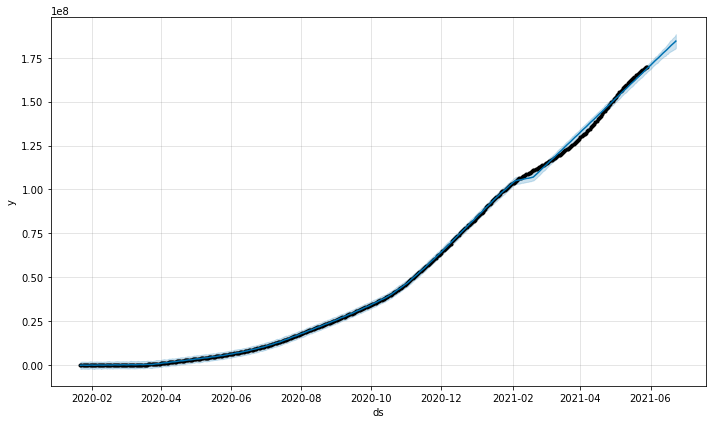

In [260]:
print(prophet_c.plot(confirmed_forecast))

### -Summarization of Forecasts using different Models

In [261]:
model_names=["Linear Regression","Polynomial Regression","Holt's Linear","Holt's Winter Model","Auto Regressive Model (AR)","Moving Average Model (MA)","ARIMA Model","SARIMA Model","Facebook's Prophet Model"]
model_summary=pd.DataFrame(zip(model_names,model_scores,r2_scores),columns=["Model Name","Root Mean Squared Error","R-Squared"]).sort_values(["Root Mean Squared Error"])
model_summary

,Model Name,Root Mean Squared Error,R-Squared
8,Facebook's Prophet Model,1.025041e+06,0.999624
2,Holt's Linear,1.696112e+06,0.848627
4,Auto Regressive Model (AR),2.350964e+06,0.709175
7,SARIMA Model,2.357813e+06,0.707478
3,Holt's Winter Model,2.594640e+06,0.645763
5,Moving Average Model (MA),2.901479e+06,0.557026
6,ARIMA Model,3.160138e+06,0.474526
1,Polynomial Regression,2.736296e+07,-38.397214
0,Linear Regression,3.354151e+07,-58.197677


## o model ทางสถิติ /เเบบเเบ่งข้อมูล

### -เตรียมข้อมูลและเเบ่งข้อมูล

In [262]:
datewise.head()

,Confirmed,Recovered,Deaths,Days Since
Date,,,,
2020-01-22,557.0,30.0,17.0,0
2020-01-23,1097.0,60.0,34.0,1
2020-01-24,941.0,39.0,26.0,2
2020-01-25,1437.0,42.0,42.0,3
2020-01-26,2118.0,56.0,56.0,4


In [263]:
train = datewise.iloc[:int(datewise.shape[0]*0.95)]
test = datewise.iloc[int(datewise.shape[0]*0.95):]

In [264]:
len(datewise) #แบ่งเป็น 2 ส่วน

494

In [265]:
len(train) # 95 % -> train

469

In [266]:
len(test) # 5 % -> test

25

In [267]:
model_scores, r2_scores=[], []

### -Validation 

#### => Polynomial Regression for Prediction of Confirmed Cases

In [268]:
from sklearn.preprocessing import PolynomialFeatures

In [269]:
# เเบ่งข้อมูล train validation 
train_ml=train.iloc[:int(train.shape[0]*0.95)]
valid_ml=train.iloc[int(train.shape[0]*0.95):]
print(len(train)) # 95 % -> train
print(len(test)) # 5 % -> test

469
25


In [270]:
poly = PolynomialFeatures(degree = 8) 

In [271]:
train_poly=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y=train_ml["Confirmed"]

In [272]:
linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





LinearRegression(normalize=True)

In [273]:
prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  15586340.852625417


In [274]:
r2_scores.append(r2_score(valid_ml["Confirmed"],prediction_poly))
r2_score(valid_ml["Confirmed"],prediction_poly)

-6.72850271107393

In [275]:
lin_reg.fit(train_Days_Since, train_Confirmed)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





LinearRegression(normalize=True)

In [276]:
comp_data=poly.fit_transform(np.array(datewise["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=linreg.predict(comp_data)

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Polynomial Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

#### =>Facebook's Prophet Model for forecasting

In [277]:
from fbprophet import Prophet
prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_confirmed=pd.DataFrame(zip(list(train.index),list(train["Confirmed"])),columns=['ds','y'])

In [278]:
prophet_confirmed

,ds,y
0,2020-01-22,557.0
1,2020-01-23,1097.0
2,2020-01-24,941.0
3,2020-01-25,1437.0
4,2020-01-26,2118.0
...,...,...
464,2021-04-30,151399480.0
465,2021-05-01,152196159.0
466,2021-05-02,152870507.0
467,2021-05-03,153552097.0


In [279]:
prophet_c.fit(prophet_confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [280]:
forecast_c=prophet_c.make_future_dataframe(periods=25)
forecast_confirmed=forecast_c.copy()

In [281]:
confirmed_forecast=prophet_c.predict(forecast_c)
#print(confirmed_forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']])

In [282]:
model_scores.append(np.sqrt(mean_squared_error(datewise["Confirmed"],confirmed_forecast['yhat'].head(datewise.shape[0]))))
print("Root Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error(datewise["Confirmed"],confirmed_forecast['yhat'].head(datewise.shape[0]))))

Root Mean Squared Error for Prophet Model:  2047471.8435125987


In [283]:
r2_scores.append(r2_score(datewise["Confirmed"],confirmed_forecast['yhat'].head(datewise.shape[0])))
r2_score(datewise["Confirmed"],confirmed_forecast['yhat'].head(datewise.shape[0]))

0.9984987388680283

Figure(720x432)


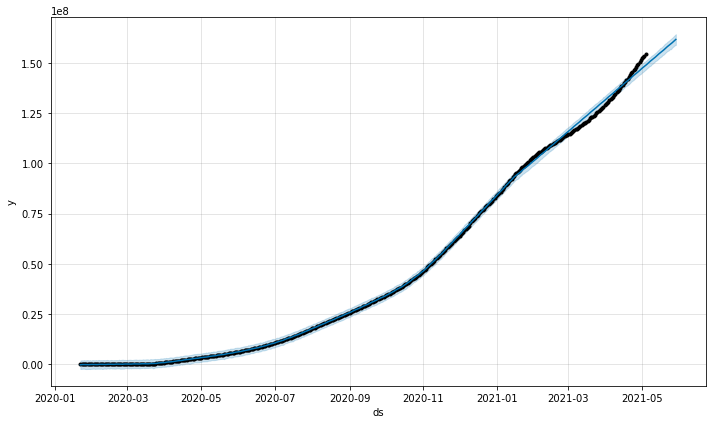

In [284]:
print(prophet_c.plot(confirmed_forecast))

#### =>Holt's Linear Model

In [285]:
model_train=train.iloc[:int(train.shape[0]*0.95)]
valid=train.iloc[int(train.shape[0]*0.95):]
y_pred=valid.copy()

In [286]:
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=0.4, smoothing_slope=0.4,optimized=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead



In [287]:
y_pred["Holt"]=holt.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))
print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))

Root Mean Square Error Holt's Linear Model:  1319260.5854602829


In [288]:
r2_scores.append(r2_score(y_pred["Confirmed"],y_pred["Holt"]))
r2_score(y_pred["Confirmed"],y_pred["Holt"])

0.9446308062304809

In [289]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Holt"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases Holt's Linear Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

#### =>Holt's Winter Model for Daily Time Series

In [290]:
model_train=train.iloc[:int(train.shape[0]*0.95)]
valid=train.iloc[int(train.shape[0]*0.95):]
y_pred=valid.copy()

In [291]:
es=ExponentialSmoothing(np.asarray(model_train['Confirmed']),seasonal_periods=14,trend='add', seasonal='mul').fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [292]:
y_pred["Holt's Winter Model"]=es.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])))
print("Root Mean Square Error for Holt's Winter Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])))

Root Mean Square Error for Holt's Winter Model:  2595019.108496646


In [293]:
r2_scores.append(r2_score(y_pred["Confirmed"],y_pred["Holt's Winter Model"]))
r2_score(y_pred["Confirmed"],y_pred["Holt's Winter Model"])

0.7857661241527331

In [294]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Holt\'s Winter Model"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases Holt's Winter Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

#### =>SARIMA Model (using AUTO ARIMA)

In [295]:
model_sarima= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', 
                         start_p=0,start_q=0,max_p=2,max_q=2,m=7,
                   suppress_warnings=True,stepwise=True,seasonal=True)
model_sarima.fit(model_train["Confirmed"])

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,0,1)[7]             : AIC=11106.114, Time=0.31 sec
 ARIMA(0,2,0)(0,0,0)[7]             : AIC=11195.570, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[7]             : AIC=11087.957, Time=0.14 sec
 ARIMA(0,2,1)(0,0,1)[7]             : AIC=11077.581, Time=0.18 sec
 ARIMA(0,2,1)(0,0,0)[7]             : AIC=11166.542, Time=0.06 sec
 ARIMA(0,2,1)(1,0,1)[7]             : AIC=10999.557, Time=0.39 sec
 ARIMA(0,2,1)(1,0,0)[7]             : AIC=11038.208, Time=0.12 sec
 ARIMA(0,2,1)(2,0,1)[7]             : AIC=10999.201, Time=0.68 sec
 ARIMA(0,2,1)(2,0,0)[7]             : AIC=11027.585, Time=0.25 sec
 ARIMA(0,2,1)(2,0,2)[7]             : AIC=11000.436, Time=1.40 sec
 ARIMA(0,2,1)(1,0,2)[7]             : AIC=10998.767, Time=0.86 sec
 ARIMA(0,2,1)(0,0,2)[7]             : AIC=11060.039, Time=0.43 sec
 ARIMA(0,2,0)(1,0,2)[7]             : AIC=11109.806, Time=0.69 sec
 ARIMA(1,2,1)(1,0,2)[7]             : AIC=10998.758, Time=1.00 sec
 ARIMA(1,2,1)(0,0,2

ARIMA(order=(2, 2, 2), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True, with_intercept=False)

In [296]:
prediction_sarima=model_sarima.predict(len(valid))
y_pred["SARIMA Model Prediction"]=prediction_sarima

In [297]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"])))
print("Root Mean Square Error for SARIMA Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"])))

Root Mean Square Error for SARIMA Model:  822902.3083813918


In [298]:
r2_scores.append(r2_score(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"]))
r2_score(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"])

0.9784571287508804

In [299]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["SARIMA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases SARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

#### Summarization of Forecasts using different Models

In [300]:
# model_names=["Linear Regression","Polynomial Regression","Support Vector Machine Regressor","Holt's Linear","Holt's Winter Model",
#             "Auto Regressive Model (AR)","Moving Average Model (MA)","ARIMA Model","SARIMA Model","Facebook's Prophet Model"]
model_names=["Polynomial Regression","Facebook's Prophet Model","Holt's Linear","Holt's Winter Model","SARIMA Model"]
model_summary=pd.DataFrame(zip(model_names,model_scores,r2_scores),columns=["Model Name","Root Mean Squared Error","R-Squared"]).sort_values(["Root Mean Squared Error"])
model_summary

,Model Name,Root Mean Squared Error,R-Squared
4,SARIMA Model,8.229023e+05,0.978457
2,Holt's Linear,1.319261e+06,0.944631
1,Facebook's Prophet Model,2.047472e+06,0.998499
3,Holt's Winter Model,2.595019e+06,0.785766
0,Polynomial Regression,1.558634e+07,-6.728503


### -สร้างตัวแบบเเละทำนาย

#### =>Facebook's Prophet Model for forecasting

In [301]:
from fbprophet import Prophet
prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_confirmed=pd.DataFrame(zip(list(datewise.index),list(train["Confirmed"])),columns=['ds','y'])

In [302]:
prophet_confirmed

,ds,y
0,2020-01-22,557.0
1,2020-01-23,1097.0
2,2020-01-24,941.0
3,2020-01-25,1437.0
4,2020-01-26,2118.0
...,...,...
464,2021-04-30,151399480.0
465,2021-05-01,152196159.0
466,2021-05-02,152870507.0
467,2021-05-03,153552097.0


In [303]:
prophet_c.fit(prophet_confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [304]:
forecast_c=prophet_c.make_future_dataframe(periods=25)
forecast_confirmed=forecast_c.copy()

In [305]:
confirmed_forecast=prophet_c.predict(forecast_c)

In [306]:
# model_scores.append(np.sqrt(mean_squared_error(datewise["Confirmed"],confirmed_forecast['yhat'].head(datewise.shape[0]))))
print("Root Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error(datewise["Confirmed"],confirmed_forecast['yhat'].head(datewise.shape[0]))))

Root Mean Squared Error for Prophet Model:  2047471.8435125987


In [307]:
r2_score(datewise["Confirmed"],confirmed_forecast['yhat'].head(datewise.shape[0]))

0.9984987388680283

Figure(720x432)


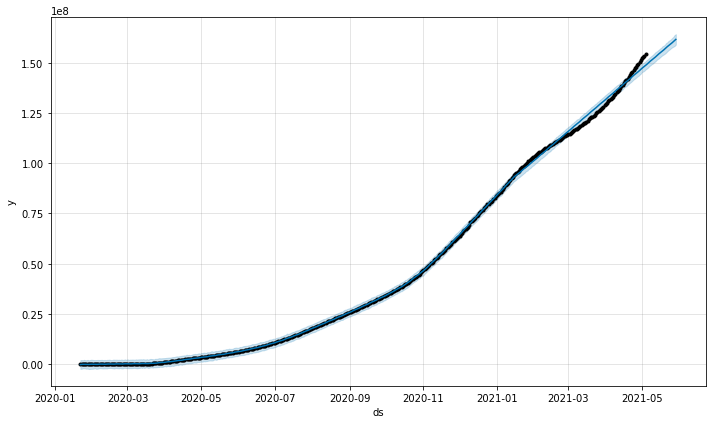

In [308]:
print(prophet_c.plot(confirmed_forecast))

#### =>SARIMA Model (using AUTO ARIMA)

In [309]:
model_train = datewise.iloc[:int(datewise.shape[0]*0.95)]
test= datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=test.copy()

In [310]:
model_sarima= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', 
                         start_p=0,start_q=0,max_p=2,max_q=2,m=7,
                   suppress_warnings=True,stepwise=True,seasonal=True)
model_sarima.fit(model_train["Confirmed"])

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,0,1)[7]             : AIC=11695.173, Time=0.42 sec
 ARIMA(0,2,0)(0,0,0)[7]             : AIC=11807.732, Time=0.03 sec
 ARIMA(1,2,0)(1,0,0)[7]             : AIC=11687.019, Time=0.14 sec
 ARIMA(0,2,1)(0,0,1)[7]             : AIC=11682.480, Time=0.20 sec
 ARIMA(0,2,1)(0,0,0)[7]             : AIC=11786.601, Time=0.07 sec
 ARIMA(0,2,1)(1,0,1)[7]             : AIC=11593.360, Time=0.44 sec
 ARIMA(0,2,1)(1,0,0)[7]             : AIC=11635.387, Time=0.13 sec
 ARIMA(0,2,1)(2,0,1)[7]             : AIC=11592.530, Time=0.66 sec
 ARIMA(0,2,1)(2,0,0)[7]             : AIC=11623.862, Time=0.31 sec
 ARIMA(0,2,1)(2,0,2)[7]             : AIC=11593.700, Time=1.56 sec
 ARIMA(0,2,1)(1,0,2)[7]             : AIC=11592.018, Time=0.88 sec
 ARIMA(0,2,1)(0,0,2)[7]             : AIC=11661.146, Time=0.46 sec
 ARIMA(0,2,0)(1,0,2)[7]             : AIC=11698.470, Time=0.80 sec
 ARIMA(1,2,1)(1,0,2)[7]             : AIC=11589.999, Time=1.45 sec
 ARIMA(1,2,1)(0,0,2

ARIMA(order=(2, 2, 2), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True, with_intercept=False)

In [311]:
prediction_sarima=model_sarima.predict(len(test))
y_pred["SARIMA Model Prediction"]=prediction_sarima

In [312]:
# model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"])))
print("Root Mean Square Error for SARIMA Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"])))

Root Mean Square Error for SARIMA Model:  2357813.2778034797


In [313]:
# r2_scores.append(r2_score(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"]))
r2_score(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"])

0.707478203313815

In [314]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["SARIMA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases SARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()